### 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('./train_santander.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET']==1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print(f'unsatisfied 비율은 {unsatisfied_cnt/total_cnt:.2f}')

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [8]:
cust_df['var3'].replace(-99999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print(f'피처 데이터 shape: {X_features.shape}')

피처 데이터 shape: (76020, 369)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
                                                    #, stratify=y_labels : train set과 test set 레이블값 분포 비율을 맞춰주는 파라미터

train_cnt = y_train.count()
test_cnt = y_test.count()
print(f'학습 세트 shape:{X_train.shape}, 테스트 세트 shape:{X_test.shape}')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape:(60816, 369), 테스트 세트 shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960438
1    0.039562
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train),(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print(f'ROC AUC: {xgb_roc_score}')

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82569	validation_1-auc:0.79270
[1]	validation_0-auc:0.84019	validation_1-auc:0.80728
[2]	validation_0-auc:0.84369	validation_1-auc:0.81015
[3]	validation_0-auc:0.84771	validation_1-auc:0.81284
[4]	validation_0-auc:0.85116	validation_1-auc:0.81467
[5]	validation_0-auc:0.85511	validation_1-auc:0.81857
[6]	validation_0-auc:0.85922	validation_1-auc:0.81974
[7]	validation_0-auc:0.86238	validation_1-auc:0.82030
[8]	validation_0-auc:0.86570	validation_1-auc:0.82144
[9]	validation_0-auc:0.86798	validation_1-auc:0.82300
[10]	validation_0-auc:0.87105	validation_1-auc:0.82377
[11]	validation_0-auc:0.87448	validation_1-auc:0.82454
[12]	validation_0-auc:0.87688	validation_1-auc:0.82400
[13]	validation_0-auc:0.87921	validation_1-auc:0.82466
[14]	validation_0-auc:0.88085	validation_1-auc:0.82534
[15]	validation_0-auc:0.88335	validation_1-auc:0.82412
[16]	validation_0-auc:0.88576	validation_1-auc:0.82479
[17]	validation_0-auc:0.88665	validation_1-auc:0.82506
[18]	validation_0-au

In [12]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',eval_set=[(X_train, y_train),(X_test,y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1],average='macro')
print(f'ROC AUC:{xgb_roc_score:.4f}')

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81196	validation_1-auc:0.78311
[1]	validation_0-auc:0.82815	validation_1-auc:0.79759
[2]	validation_0-auc:0.83364	validation_1-auc:0.80231
[3]	validation_0-auc:0.83628	validation_1-auc:0.80267
[4]	validation_0-auc:0.83979	validation_1-auc:0.80647
[5]	validation_0-auc:0.84405	validation_1-auc:0.80978
[6]	validation_0-auc:0.84408	validation_1-auc:0.81103
[7]	validation_0-auc:0.85033	validation_1-auc:0.81607
[8]	validation_0-auc:0.85357	validation_1-auc:0.81771
[9]	validation_0-auc:0.85404	validation_1-auc:0.81508
[10]	validation_0-auc:0.85333	validation_1-auc:0.80812
[11]	validation_0-auc:0.85348	validation_1-auc:0.80705
[12]	validation_0-auc:0.85882	validation_1-auc:0.81215
[13]	validation_0-auc:0.86287	validation_1-auc:0.81618
[14]	validation_0-auc:0.86477	validation_1-auc:0.81885
[15]	validation_0-auc:0.86622	validation_1-auc:0.81808
[16]	validation_0-auc:0.86790	validation_1-auc:0.81950
[17]	validation_0-auc:0.86935	validation_1-auc:0.82026
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80413	validation_1-auc:0.77478
[1]	validation_0-auc:0.82443	validation_1-auc:0.79170
[2]	validation_0-auc:0.83344	validation_1-auc:0.80294
[3]	validation_0-auc:0.83715	validation_1-auc:0.80612
[4]	validation_0-auc:0.84016	validation_1-auc:0.80942
[5]	validation_0-auc:0.84294	validation_1-auc:0.80869
[6]	validation_0-auc:0.84259	validation_1-auc:0.80731
[7]	validation_0-auc:0.84824	validation_1-auc:0.81229
[8]	validation_0-auc:0.85239	validation_1-auc:0.81684
[9]	validation_0-auc:0.85437	validation_1-auc:0.81316
[10]	validation_0-auc:0.85412	validation_1-auc:0.80958
[11]	validation_0-auc:0.85496	validation_1-auc:0.80690
[12]	validation_0-auc:0.85997	validation_1-auc:0.81257
[13]	validation_0-auc:0.86348	validation_1-auc:0.81494
[14]	validation_0-auc:0.86523	validation_1-auc:0.81739
[15]	validation_0-auc:0.86679	validation_1-auc:0.81599
[16]	validation_0-auc:0.86785	validation_1-auc:0.81801
[17]	validation_0-auc:0.86971	validation_1-auc:0.81903
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80538	validation_1-auc:0.77744
[1]	validation_0-auc:0.82513	validation_1-auc:0.79336
[2]	validation_0-auc:0.83523	validation_1-auc:0.80539
[3]	validation_0-auc:0.83633	validation_1-auc:0.80589
[4]	validation_0-auc:0.83990	validation_1-auc:0.80931
[5]	validation_0-auc:0.84383	validation_1-auc:0.80933
[6]	validation_0-auc:0.84384	validation_1-auc:0.80945
[7]	validation_0-auc:0.85141	validation_1-auc:0.81511
[8]	validation_0-auc:0.85464	validation_1-auc:0.81980
[9]	validation_0-auc:0.85500	validation_1-auc:0.81631
[10]	validation_0-auc:0.85399	validation_1-auc:0.81148
[11]	validation_0-auc:0.85424	validation_1-auc:0.80961
[12]	validation_0-auc:0.85944	validation_1-auc:0.81598
[13]	validation_0-auc:0.86318	validation_1-auc:0.82036
[14]	validation_0-auc:0.86431	validation_1-auc:0.82078
[15]	validation_0-auc:0.86541	validation_1-auc:0.82000
[16]	validation_0-auc:0.86690	validation_1-auc:0.82194
[17]	validation_0-auc:0.86896	validation_1-auc:0.82250
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81438	validation_1-auc:0.78815
[1]	validation_0-auc:0.83069	validation_1-auc:0.80081
[2]	validation_0-auc:0.83551	validation_1-auc:0.80440
[3]	validation_0-auc:0.83982	validation_1-auc:0.80669
[4]	validation_0-auc:0.84157	validation_1-auc:0.80774
[5]	validation_0-auc:0.84461	validation_1-auc:0.80953
[6]	validation_0-auc:0.84533	validation_1-auc:0.80685
[7]	validation_0-auc:0.84996	validation_1-auc:0.81171
[8]	validation_0-auc:0.85305	validation_1-auc:0.81596
[9]	validation_0-auc:0.85237	validation_1-auc:0.81168
[10]	validation_0-auc:0.85213	validation_1-auc:0.80620
[11]	validation_0-auc:0.85245	validation_1-auc:0.80542
[12]	validation_0-auc:0.85779	validation_1-auc:0.81092
[13]	validation_0-auc:0.86187	validation_1-auc:0.81475
[14]	validation_0-auc:0.86380	validation_1-auc:0.81748
[15]	validation_0-auc:0.86522	validation_1-auc:0.81738
[16]	validation_0-auc:0.86646	validation_1-auc:0.81966
[17]	validation_0-auc:0.86820	validation_1-auc:0.82076
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81069	validation_1-auc:0.78599
[1]	validation_0-auc:0.83132	validation_1-auc:0.80272
[2]	validation_0-auc:0.83632	validation_1-auc:0.81009
[3]	validation_0-auc:0.83694	validation_1-auc:0.80785
[4]	validation_0-auc:0.84213	validation_1-auc:0.81207
[5]	validation_0-auc:0.84361	validation_1-auc:0.80922
[6]	validation_0-auc:0.84408	validation_1-auc:0.80712
[7]	validation_0-auc:0.85097	validation_1-auc:0.81336
[8]	validation_0-auc:0.85384	validation_1-auc:0.81675
[9]	validation_0-auc:0.85358	validation_1-auc:0.81322
[10]	validation_0-auc:0.85337	validation_1-auc:0.81003
[11]	validation_0-auc:0.85337	validation_1-auc:0.80910
[12]	validation_0-auc:0.85833	validation_1-auc:0.81418
[13]	validation_0-auc:0.86149	validation_1-auc:0.81935
[14]	validation_0-auc:0.86342	validation_1-auc:0.82036
[15]	validation_0-auc:0.86452	validation_1-auc:0.81874
[16]	validation_0-auc:0.86567	validation_1-auc:0.82121
[17]	validation_0-auc:0.86745	validation_1-auc:0.82276
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81093	validation_1-auc:0.78344
[1]	validation_0-auc:0.82761	validation_1-auc:0.79942
[2]	validation_0-auc:0.83469	validation_1-auc:0.80406
[3]	validation_0-auc:0.83710	validation_1-auc:0.80770
[4]	validation_0-auc:0.84186	validation_1-auc:0.81303
[5]	validation_0-auc:0.84434	validation_1-auc:0.81215
[6]	validation_0-auc:0.84295	validation_1-auc:0.81177
[7]	validation_0-auc:0.84888	validation_1-auc:0.81587
[8]	validation_0-auc:0.85170	validation_1-auc:0.81872
[9]	validation_0-auc:0.85169	validation_1-auc:0.81536
[10]	validation_0-auc:0.85086	validation_1-auc:0.81243
[11]	validation_0-auc:0.85066	validation_1-auc:0.81011
[12]	validation_0-auc:0.85561	validation_1-auc:0.81449
[13]	validation_0-auc:0.85999	validation_1-auc:0.81874
[14]	validation_0-auc:0.86139	validation_1-auc:0.82012
[15]	validation_0-auc:0.86281	validation_1-auc:0.81982
[16]	validation_0-auc:0.86406	validation_1-auc:0.82235
[17]	validation_0-auc:0.86525	validation_1-auc:0.82258
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80412	validation_1-auc:0.77157
[1]	validation_0-auc:0.82371	validation_1-auc:0.79192
[2]	validation_0-auc:0.83260	validation_1-auc:0.80363
[3]	validation_0-auc:0.83809	validation_1-auc:0.80815
[4]	validation_0-auc:0.84217	validation_1-auc:0.81438
[5]	validation_0-auc:0.84284	validation_1-auc:0.80967
[6]	validation_0-auc:0.84130	validation_1-auc:0.80700
[7]	validation_0-auc:0.84717	validation_1-auc:0.81253
[8]	validation_0-auc:0.85223	validation_1-auc:0.81643
[9]	validation_0-auc:0.85361	validation_1-auc:0.81283
[10]	validation_0-auc:0.85392	validation_1-auc:0.81040
[11]	validation_0-auc:0.85369	validation_1-auc:0.80912
[12]	validation_0-auc:0.85815	validation_1-auc:0.81441
[13]	validation_0-auc:0.86144	validation_1-auc:0.81707
[14]	validation_0-auc:0.86337	validation_1-auc:0.81917
[15]	validation_0-auc:0.86492	validation_1-auc:0.81920
[16]	validation_0-auc:0.86591	validation_1-auc:0.82037
[17]	validation_0-auc:0.86738	validation_1-auc:0.82050
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80648	validation_1-auc:0.77981
[1]	validation_0-auc:0.82462	validation_1-auc:0.79283
[2]	validation_0-auc:0.83492	validation_1-auc:0.80556
[3]	validation_0-auc:0.83593	validation_1-auc:0.80577
[4]	validation_0-auc:0.83794	validation_1-auc:0.80770
[5]	validation_0-auc:0.84289	validation_1-auc:0.80848
[6]	validation_0-auc:0.84285	validation_1-auc:0.80640
[7]	validation_0-auc:0.84985	validation_1-auc:0.81215
[8]	validation_0-auc:0.85331	validation_1-auc:0.81564
[9]	validation_0-auc:0.85353	validation_1-auc:0.81253
[10]	validation_0-auc:0.85231	validation_1-auc:0.80888
[11]	validation_0-auc:0.85255	validation_1-auc:0.80739
[12]	validation_0-auc:0.85737	validation_1-auc:0.81491
[13]	validation_0-auc:0.86133	validation_1-auc:0.81867
[14]	validation_0-auc:0.86280	validation_1-auc:0.82116
[15]	validation_0-auc:0.86426	validation_1-auc:0.81971
[16]	validation_0-auc:0.86601	validation_1-auc:0.82106
[17]	validation_0-auc:0.86734	validation_1-auc:0.82180
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81378	validation_1-auc:0.78841
[1]	validation_0-auc:0.83066	validation_1-auc:0.80140
[2]	validation_0-auc:0.83639	validation_1-auc:0.80502
[3]	validation_0-auc:0.83971	validation_1-auc:0.80698
[4]	validation_0-auc:0.84168	validation_1-auc:0.81087
[5]	validation_0-auc:0.84476	validation_1-auc:0.81000
[6]	validation_0-auc:0.84547	validation_1-auc:0.80695
[7]	validation_0-auc:0.84961	validation_1-auc:0.81206
[8]	validation_0-auc:0.85208	validation_1-auc:0.81562
[9]	validation_0-auc:0.85293	validation_1-auc:0.81384
[10]	validation_0-auc:0.85176	validation_1-auc:0.80998
[11]	validation_0-auc:0.85217	validation_1-auc:0.80815
[12]	validation_0-auc:0.85656	validation_1-auc:0.81357
[13]	validation_0-auc:0.86029	validation_1-auc:0.81716
[14]	validation_0-auc:0.86224	validation_1-auc:0.81981
[15]	validation_0-auc:0.86382	validation_1-auc:0.81816
[16]	validation_0-auc:0.86545	validation_1-auc:0.81967
[17]	validation_0-auc:0.86729	validation_1-auc:0.82048
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81166	validation_1-auc:0.78827
[1]	validation_0-auc:0.83074	validation_1-auc:0.80555
[2]	validation_0-auc:0.83694	validation_1-auc:0.81166
[3]	validation_0-auc:0.83904	validation_1-auc:0.81318
[4]	validation_0-auc:0.84183	validation_1-auc:0.81557
[5]	validation_0-auc:0.84369	validation_1-auc:0.81187
[6]	validation_0-auc:0.84358	validation_1-auc:0.81032
[7]	validation_0-auc:0.84970	validation_1-auc:0.81444
[8]	validation_0-auc:0.85267	validation_1-auc:0.81740
[9]	validation_0-auc:0.85295	validation_1-auc:0.81356
[10]	validation_0-auc:0.85261	validation_1-auc:0.81051
[11]	validation_0-auc:0.85272	validation_1-auc:0.80956
[12]	validation_0-auc:0.85769	validation_1-auc:0.81617
[13]	validation_0-auc:0.86097	validation_1-auc:0.82062
[14]	validation_0-auc:0.86238	validation_1-auc:0.82284
[15]	validation_0-auc:0.86333	validation_1-auc:0.82128
[16]	validation_0-auc:0.86449	validation_1-auc:0.82277
[17]	validation_0-auc:0.86638	validation_1-auc:0.82447
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82383	validation_1-auc:0.79007
[1]	validation_0-auc:0.83585	validation_1-auc:0.79909
[2]	validation_0-auc:0.84232	validation_1-auc:0.80374
[3]	validation_0-auc:0.84606	validation_1-auc:0.80722
[4]	validation_0-auc:0.84947	validation_1-auc:0.81015
[5]	validation_0-auc:0.85501	validation_1-auc:0.81079
[6]	validation_0-auc:0.85611	validation_1-auc:0.80893
[7]	validation_0-auc:0.86450	validation_1-auc:0.81530
[8]	validation_0-auc:0.86905	validation_1-auc:0.81803
[9]	validation_0-auc:0.86943	validation_1-auc:0.81370
[10]	validation_0-auc:0.86956	validation_1-auc:0.80884
[11]	validation_0-auc:0.86997	validation_1-auc:0.80595
[12]	validation_0-auc:0.87565	validation_1-auc:0.81024
[13]	validation_0-auc:0.88238	validation_1-auc:0.81484
[14]	validation_0-auc:0.88480	validation_1-auc:0.81593
[15]	validation_0-auc:0.88663	validation_1-auc:0.81732
[16]	validation_0-auc:0.88845	validation_1-auc:0.81933
[17]	validation_0-auc:0.89115	validation_1-auc:0.82112
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82252	validation_1-auc:0.78949
[1]	validation_0-auc:0.83720	validation_1-auc:0.80190
[2]	validation_0-auc:0.84182	validation_1-auc:0.80430
[3]	validation_0-auc:0.84681	validation_1-auc:0.80973
[4]	validation_0-auc:0.85356	validation_1-auc:0.81511
[5]	validation_0-auc:0.85553	validation_1-auc:0.81243
[6]	validation_0-auc:0.85850	validation_1-auc:0.81025
[7]	validation_0-auc:0.86629	validation_1-auc:0.81409
[8]	validation_0-auc:0.87157	validation_1-auc:0.81752
[9]	validation_0-auc:0.87265	validation_1-auc:0.81505
[10]	validation_0-auc:0.87360	validation_1-auc:0.81092
[11]	validation_0-auc:0.87447	validation_1-auc:0.80611
[12]	validation_0-auc:0.87904	validation_1-auc:0.81116
[13]	validation_0-auc:0.88265	validation_1-auc:0.81430
[14]	validation_0-auc:0.88528	validation_1-auc:0.81591
[15]	validation_0-auc:0.88698	validation_1-auc:0.81561
[16]	validation_0-auc:0.89000	validation_1-auc:0.81773
[17]	validation_0-auc:0.89197	validation_1-auc:0.81877
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81985	validation_1-auc:0.78915
[1]	validation_0-auc:0.83887	validation_1-auc:0.80596
[2]	validation_0-auc:0.84440	validation_1-auc:0.80938
[3]	validation_0-auc:0.84727	validation_1-auc:0.81247
[4]	validation_0-auc:0.85242	validation_1-auc:0.81586
[5]	validation_0-auc:0.85480	validation_1-auc:0.81287
[6]	validation_0-auc:0.85477	validation_1-auc:0.80931
[7]	validation_0-auc:0.86518	validation_1-auc:0.81660
[8]	validation_0-auc:0.87036	validation_1-auc:0.82071
[9]	validation_0-auc:0.87243	validation_1-auc:0.81580
[10]	validation_0-auc:0.87235	validation_1-auc:0.81170
[11]	validation_0-auc:0.87360	validation_1-auc:0.81057
[12]	validation_0-auc:0.88026	validation_1-auc:0.81649
[13]	validation_0-auc:0.88524	validation_1-auc:0.82029
[14]	validation_0-auc:0.88653	validation_1-auc:0.82143
[15]	validation_0-auc:0.88798	validation_1-auc:0.82066
[16]	validation_0-auc:0.89030	validation_1-auc:0.82257
[17]	validation_0-auc:0.89247	validation_1-auc:0.82193
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82160	validation_1-auc:0.79136
[1]	validation_0-auc:0.83743	validation_1-auc:0.80204
[2]	validation_0-auc:0.84643	validation_1-auc:0.80794
[3]	validation_0-auc:0.84918	validation_1-auc:0.80939
[4]	validation_0-auc:0.85476	validation_1-auc:0.81427
[5]	validation_0-auc:0.85710	validation_1-auc:0.81114
[6]	validation_0-auc:0.85955	validation_1-auc:0.80848
[7]	validation_0-auc:0.86501	validation_1-auc:0.81330
[8]	validation_0-auc:0.86871	validation_1-auc:0.81845
[9]	validation_0-auc:0.87119	validation_1-auc:0.81415
[10]	validation_0-auc:0.87328	validation_1-auc:0.80755
[11]	validation_0-auc:0.87400	validation_1-auc:0.80458
[12]	validation_0-auc:0.87956	validation_1-auc:0.81233
[13]	validation_0-auc:0.88419	validation_1-auc:0.81554
[14]	validation_0-auc:0.88617	validation_1-auc:0.81742
[15]	validation_0-auc:0.88741	validation_1-auc:0.81733
[16]	validation_0-auc:0.88908	validation_1-auc:0.81886
[17]	validation_0-auc:0.89073	validation_1-auc:0.82129
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81680	validation_1-auc:0.78712
[1]	validation_0-auc:0.83705	validation_1-auc:0.80245
[2]	validation_0-auc:0.84275	validation_1-auc:0.80798
[3]	validation_0-auc:0.84770	validation_1-auc:0.81179
[4]	validation_0-auc:0.85475	validation_1-auc:0.81405
[5]	validation_0-auc:0.85661	validation_1-auc:0.81000
[6]	validation_0-auc:0.85974	validation_1-auc:0.80830
[7]	validation_0-auc:0.86532	validation_1-auc:0.81430
[8]	validation_0-auc:0.86993	validation_1-auc:0.81733
[9]	validation_0-auc:0.87155	validation_1-auc:0.81181
[10]	validation_0-auc:0.87307	validation_1-auc:0.80750
[11]	validation_0-auc:0.87455	validation_1-auc:0.80434
[12]	validation_0-auc:0.88013	validation_1-auc:0.81011
[13]	validation_0-auc:0.88462	validation_1-auc:0.81325
[14]	validation_0-auc:0.88652	validation_1-auc:0.81408
[15]	validation_0-auc:0.88811	validation_1-auc:0.81259
[16]	validation_0-auc:0.89025	validation_1-auc:0.81588
[17]	validation_0-auc:0.89180	validation_1-auc:0.81737
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82249	validation_1-auc:0.79158
[1]	validation_0-auc:0.83472	validation_1-auc:0.80236
[2]	validation_0-auc:0.84158	validation_1-auc:0.80600
[3]	validation_0-auc:0.84454	validation_1-auc:0.80847
[4]	validation_0-auc:0.85144	validation_1-auc:0.81444
[5]	validation_0-auc:0.85530	validation_1-auc:0.81257
[6]	validation_0-auc:0.85636	validation_1-auc:0.81240
[7]	validation_0-auc:0.86371	validation_1-auc:0.81850
[8]	validation_0-auc:0.86777	validation_1-auc:0.81993
[9]	validation_0-auc:0.86740	validation_1-auc:0.81744
[10]	validation_0-auc:0.86730	validation_1-auc:0.81202
[11]	validation_0-auc:0.86692	validation_1-auc:0.81042
[12]	validation_0-auc:0.87264	validation_1-auc:0.81390
[13]	validation_0-auc:0.87738	validation_1-auc:0.81797
[14]	validation_0-auc:0.87899	validation_1-auc:0.81834
[15]	validation_0-auc:0.88026	validation_1-auc:0.81839
[16]	validation_0-auc:0.88252	validation_1-auc:0.82022
[17]	validation_0-auc:0.88506	validation_1-auc:0.82054
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81932	validation_1-auc:0.78671
[1]	validation_0-auc:0.83759	validation_1-auc:0.80584
[2]	validation_0-auc:0.84345	validation_1-auc:0.81192
[3]	validation_0-auc:0.84731	validation_1-auc:0.81315
[4]	validation_0-auc:0.85379	validation_1-auc:0.81734
[5]	validation_0-auc:0.85522	validation_1-auc:0.81444
[6]	validation_0-auc:0.85754	validation_1-auc:0.81056
[7]	validation_0-auc:0.86402	validation_1-auc:0.81478
[8]	validation_0-auc:0.86952	validation_1-auc:0.81712
[9]	validation_0-auc:0.86930	validation_1-auc:0.81363
[10]	validation_0-auc:0.86918	validation_1-auc:0.80975
[11]	validation_0-auc:0.87017	validation_1-auc:0.80482
[12]	validation_0-auc:0.87535	validation_1-auc:0.81137
[13]	validation_0-auc:0.87896	validation_1-auc:0.81501
[14]	validation_0-auc:0.88113	validation_1-auc:0.81776
[15]	validation_0-auc:0.88288	validation_1-auc:0.81720
[16]	validation_0-auc:0.88500	validation_1-auc:0.81736
[17]	validation_0-auc:0.88771	validation_1-auc:0.81755
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81851	validation_1-auc:0.78942
[1]	validation_0-auc:0.83866	validation_1-auc:0.80601
[2]	validation_0-auc:0.84358	validation_1-auc:0.80768
[3]	validation_0-auc:0.84693	validation_1-auc:0.81268
[4]	validation_0-auc:0.85317	validation_1-auc:0.81675
[5]	validation_0-auc:0.85554	validation_1-auc:0.81502
[6]	validation_0-auc:0.85552	validation_1-auc:0.81117
[7]	validation_0-auc:0.86352	validation_1-auc:0.81715
[8]	validation_0-auc:0.86926	validation_1-auc:0.81901
[9]	validation_0-auc:0.86998	validation_1-auc:0.81497
[10]	validation_0-auc:0.86964	validation_1-auc:0.81132
[11]	validation_0-auc:0.86975	validation_1-auc:0.81086
[12]	validation_0-auc:0.87485	validation_1-auc:0.81590
[13]	validation_0-auc:0.87940	validation_1-auc:0.81882
[14]	validation_0-auc:0.88121	validation_1-auc:0.82007
[15]	validation_0-auc:0.88201	validation_1-auc:0.81976
[16]	validation_0-auc:0.88361	validation_1-auc:0.82132
[17]	validation_0-auc:0.88619	validation_1-auc:0.82171
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81953	validation_1-auc:0.79122
[1]	validation_0-auc:0.83591	validation_1-auc:0.80267
[2]	validation_0-auc:0.84569	validation_1-auc:0.80737
[3]	validation_0-auc:0.84911	validation_1-auc:0.80872
[4]	validation_0-auc:0.85352	validation_1-auc:0.81314
[5]	validation_0-auc:0.85681	validation_1-auc:0.81103
[6]	validation_0-auc:0.85839	validation_1-auc:0.80663
[7]	validation_0-auc:0.86365	validation_1-auc:0.81175
[8]	validation_0-auc:0.86865	validation_1-auc:0.81556
[9]	validation_0-auc:0.87028	validation_1-auc:0.81352
[10]	validation_0-auc:0.86957	validation_1-auc:0.80834
[11]	validation_0-auc:0.86978	validation_1-auc:0.80670
[12]	validation_0-auc:0.87477	validation_1-auc:0.81174
[13]	validation_0-auc:0.87850	validation_1-auc:0.81513
[14]	validation_0-auc:0.88063	validation_1-auc:0.81730
[15]	validation_0-auc:0.88174	validation_1-auc:0.81643
[16]	validation_0-auc:0.88317	validation_1-auc:0.81769
[17]	validation_0-auc:0.88458	validation_1-auc:0.81892
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81612	validation_1-auc:0.79038
[1]	validation_0-auc:0.83833	validation_1-auc:0.80511
[2]	validation_0-auc:0.84406	validation_1-auc:0.80980
[3]	validation_0-auc:0.84867	validation_1-auc:0.81360
[4]	validation_0-auc:0.85453	validation_1-auc:0.81664
[5]	validation_0-auc:0.85773	validation_1-auc:0.81201
[6]	validation_0-auc:0.85858	validation_1-auc:0.80885
[7]	validation_0-auc:0.86530	validation_1-auc:0.81257
[8]	validation_0-auc:0.86998	validation_1-auc:0.81676
[9]	validation_0-auc:0.87030	validation_1-auc:0.81101
[10]	validation_0-auc:0.87076	validation_1-auc:0.80690
[11]	validation_0-auc:0.87156	validation_1-auc:0.80623
[12]	validation_0-auc:0.87661	validation_1-auc:0.81274
[13]	validation_0-auc:0.88054	validation_1-auc:0.81528
[14]	validation_0-auc:0.88279	validation_1-auc:0.81698
[15]	validation_0-auc:0.88368	validation_1-auc:0.81557
[16]	validation_0-auc:0.88503	validation_1-auc:0.81815
[17]	validation_0-auc:0.88665	validation_1-auc:0.81956
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81928	validation_1-auc:0.78821
[1]	validation_0-auc:0.82883	validation_1-auc:0.79666
[2]	validation_0-auc:0.83355	validation_1-auc:0.80178
[3]	validation_0-auc:0.83691	validation_1-auc:0.80540
[4]	validation_0-auc:0.84012	validation_1-auc:0.80861
[5]	validation_0-auc:0.84149	validation_1-auc:0.80842
[6]	validation_0-auc:0.84741	validation_1-auc:0.81403
[7]	validation_0-auc:0.84853	validation_1-auc:0.81507
[8]	validation_0-auc:0.85112	validation_1-auc:0.81622
[9]	validation_0-auc:0.85358	validation_1-auc:0.81769
[10]	validation_0-auc:0.85587	validation_1-auc:0.81503
[11]	validation_0-auc:0.85612	validation_1-auc:0.81222
[12]	validation_0-auc:0.86023	validation_1-auc:0.81532
[13]	validation_0-auc:0.86346	validation_1-auc:0.81835
[14]	validation_0-auc:0.86511	validation_1-auc:0.82065
[15]	validation_0-auc:0.86643	validation_1-auc:0.82253
[16]	validation_0-auc:0.86773	validation_1-auc:0.82364
[17]	validation_0-auc:0.86942	validation_1-auc:0.82327
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81944	validation_1-auc:0.78595
[1]	validation_0-auc:0.83068	validation_1-auc:0.79907
[2]	validation_0-auc:0.83212	validation_1-auc:0.79931
[3]	validation_0-auc:0.83482	validation_1-auc:0.80226
[4]	validation_0-auc:0.83854	validation_1-auc:0.80852
[5]	validation_0-auc:0.84358	validation_1-auc:0.81089
[6]	validation_0-auc:0.84854	validation_1-auc:0.81578
[7]	validation_0-auc:0.85178	validation_1-auc:0.81934
[8]	validation_0-auc:0.85464	validation_1-auc:0.82015
[9]	validation_0-auc:0.85663	validation_1-auc:0.81890
[10]	validation_0-auc:0.85913	validation_1-auc:0.81580
[11]	validation_0-auc:0.85966	validation_1-auc:0.81366
[12]	validation_0-auc:0.86310	validation_1-auc:0.81577
[13]	validation_0-auc:0.86560	validation_1-auc:0.81864
[14]	validation_0-auc:0.86733	validation_1-auc:0.81971
[15]	validation_0-auc:0.86880	validation_1-auc:0.82147
[16]	validation_0-auc:0.86994	validation_1-auc:0.82154
[17]	validation_0-auc:0.87054	validation_1-auc:0.82152
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81965	validation_1-auc:0.79041
[1]	validation_0-auc:0.82937	validation_1-auc:0.80004
[2]	validation_0-auc:0.83626	validation_1-auc:0.80476
[3]	validation_0-auc:0.84125	validation_1-auc:0.81029
[4]	validation_0-auc:0.84319	validation_1-auc:0.81155
[5]	validation_0-auc:0.84503	validation_1-auc:0.81263
[6]	validation_0-auc:0.85008	validation_1-auc:0.81596
[7]	validation_0-auc:0.85164	validation_1-auc:0.81794
[8]	validation_0-auc:0.85357	validation_1-auc:0.81800
[9]	validation_0-auc:0.85674	validation_1-auc:0.81832
[10]	validation_0-auc:0.85756	validation_1-auc:0.81662
[11]	validation_0-auc:0.85840	validation_1-auc:0.81481
[12]	validation_0-auc:0.86206	validation_1-auc:0.81761
[13]	validation_0-auc:0.86412	validation_1-auc:0.81914
[14]	validation_0-auc:0.86656	validation_1-auc:0.82051
[15]	validation_0-auc:0.86820	validation_1-auc:0.82130
[16]	validation_0-auc:0.86890	validation_1-auc:0.82196
[17]	validation_0-auc:0.86936	validation_1-auc:0.82208
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82071	validation_1-auc:0.78789
[1]	validation_0-auc:0.83105	validation_1-auc:0.80036
[2]	validation_0-auc:0.83538	validation_1-auc:0.80560
[3]	validation_0-auc:0.83762	validation_1-auc:0.80690
[4]	validation_0-auc:0.84047	validation_1-auc:0.81126
[5]	validation_0-auc:0.84252	validation_1-auc:0.81234
[6]	validation_0-auc:0.84727	validation_1-auc:0.81638
[7]	validation_0-auc:0.84912	validation_1-auc:0.81736
[8]	validation_0-auc:0.85131	validation_1-auc:0.81853
[9]	validation_0-auc:0.85380	validation_1-auc:0.81649
[10]	validation_0-auc:0.85589	validation_1-auc:0.81192
[11]	validation_0-auc:0.85678	validation_1-auc:0.80976
[12]	validation_0-auc:0.86028	validation_1-auc:0.81329
[13]	validation_0-auc:0.86309	validation_1-auc:0.81818
[14]	validation_0-auc:0.86509	validation_1-auc:0.82020
[15]	validation_0-auc:0.86698	validation_1-auc:0.82154
[16]	validation_0-auc:0.86853	validation_1-auc:0.82137
[17]	validation_0-auc:0.86977	validation_1-auc:0.82191
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81988	validation_1-auc:0.79303
[1]	validation_0-auc:0.83348	validation_1-auc:0.80744
[2]	validation_0-auc:0.83548	validation_1-auc:0.80868
[3]	validation_0-auc:0.83746	validation_1-auc:0.81010
[4]	validation_0-auc:0.84328	validation_1-auc:0.81638
[5]	validation_0-auc:0.84469	validation_1-auc:0.81700
[6]	validation_0-auc:0.84867	validation_1-auc:0.81693
[7]	validation_0-auc:0.85059	validation_1-auc:0.81915
[8]	validation_0-auc:0.85326	validation_1-auc:0.82094
[9]	validation_0-auc:0.85580	validation_1-auc:0.82025
[10]	validation_0-auc:0.85673	validation_1-auc:0.81725
[11]	validation_0-auc:0.85735	validation_1-auc:0.81679
[12]	validation_0-auc:0.86113	validation_1-auc:0.81978
[13]	validation_0-auc:0.86374	validation_1-auc:0.82266
[14]	validation_0-auc:0.86605	validation_1-auc:0.82414
[15]	validation_0-auc:0.86691	validation_1-auc:0.82457
[16]	validation_0-auc:0.86816	validation_1-auc:0.82428
[17]	validation_0-auc:0.86948	validation_1-auc:0.82409
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81773	validation_1-auc:0.78987
[1]	validation_0-auc:0.82851	validation_1-auc:0.79684
[2]	validation_0-auc:0.83472	validation_1-auc:0.80199
[3]	validation_0-auc:0.83886	validation_1-auc:0.80661
[4]	validation_0-auc:0.84297	validation_1-auc:0.81114
[5]	validation_0-auc:0.84380	validation_1-auc:0.81214
[6]	validation_0-auc:0.84841	validation_1-auc:0.81478
[7]	validation_0-auc:0.84995	validation_1-auc:0.81735
[8]	validation_0-auc:0.85321	validation_1-auc:0.81801
[9]	validation_0-auc:0.85472	validation_1-auc:0.81876
[10]	validation_0-auc:0.85675	validation_1-auc:0.81702
[11]	validation_0-auc:0.85708	validation_1-auc:0.81506
[12]	validation_0-auc:0.86055	validation_1-auc:0.81848
[13]	validation_0-auc:0.86304	validation_1-auc:0.82067
[14]	validation_0-auc:0.86372	validation_1-auc:0.82130
[15]	validation_0-auc:0.86540	validation_1-auc:0.82159
[16]	validation_0-auc:0.86674	validation_1-auc:0.82234
[17]	validation_0-auc:0.86782	validation_1-auc:0.82330
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81864	validation_1-auc:0.78748
[1]	validation_0-auc:0.83076	validation_1-auc:0.79877
[2]	validation_0-auc:0.83497	validation_1-auc:0.80431
[3]	validation_0-auc:0.83907	validation_1-auc:0.80892
[4]	validation_0-auc:0.84364	validation_1-auc:0.81421
[5]	validation_0-auc:0.84466	validation_1-auc:0.81381
[6]	validation_0-auc:0.84958	validation_1-auc:0.81807
[7]	validation_0-auc:0.85142	validation_1-auc:0.82021
[8]	validation_0-auc:0.85313	validation_1-auc:0.82053
[9]	validation_0-auc:0.85573	validation_1-auc:0.82054
[10]	validation_0-auc:0.85780	validation_1-auc:0.81786
[11]	validation_0-auc:0.85809	validation_1-auc:0.81518
[12]	validation_0-auc:0.86162	validation_1-auc:0.81803
[13]	validation_0-auc:0.86357	validation_1-auc:0.82051
[14]	validation_0-auc:0.86558	validation_1-auc:0.82196
[15]	validation_0-auc:0.86741	validation_1-auc:0.82284
[16]	validation_0-auc:0.86833	validation_1-auc:0.82329
[17]	validation_0-auc:0.86939	validation_1-auc:0.82289
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81935	validation_1-auc:0.79072
[1]	validation_0-auc:0.82871	validation_1-auc:0.80066
[2]	validation_0-auc:0.83801	validation_1-auc:0.81041
[3]	validation_0-auc:0.84078	validation_1-auc:0.81264
[4]	validation_0-auc:0.84377	validation_1-auc:0.81489
[5]	validation_0-auc:0.84547	validation_1-auc:0.81593
[6]	validation_0-auc:0.84923	validation_1-auc:0.81795
[7]	validation_0-auc:0.85117	validation_1-auc:0.82156
[8]	validation_0-auc:0.85312	validation_1-auc:0.82136
[9]	validation_0-auc:0.85622	validation_1-auc:0.82134
[10]	validation_0-auc:0.85743	validation_1-auc:0.81966
[11]	validation_0-auc:0.85728	validation_1-auc:0.81900
[12]	validation_0-auc:0.86092	validation_1-auc:0.82195
[13]	validation_0-auc:0.86310	validation_1-auc:0.82245
[14]	validation_0-auc:0.86479	validation_1-auc:0.82343
[15]	validation_0-auc:0.86620	validation_1-auc:0.82435
[16]	validation_0-auc:0.86706	validation_1-auc:0.82525
[17]	validation_0-auc:0.86866	validation_1-auc:0.82534
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82391	validation_1-auc:0.79430
[1]	validation_0-auc:0.83305	validation_1-auc:0.80390
[2]	validation_0-auc:0.83588	validation_1-auc:0.80398
[3]	validation_0-auc:0.83864	validation_1-auc:0.80871
[4]	validation_0-auc:0.84096	validation_1-auc:0.81137
[5]	validation_0-auc:0.84270	validation_1-auc:0.81288
[6]	validation_0-auc:0.84863	validation_1-auc:0.81722
[7]	validation_0-auc:0.85028	validation_1-auc:0.81883
[8]	validation_0-auc:0.85226	validation_1-auc:0.81928
[9]	validation_0-auc:0.85481	validation_1-auc:0.81997
[10]	validation_0-auc:0.85608	validation_1-auc:0.81548
[11]	validation_0-auc:0.85642	validation_1-auc:0.81322
[12]	validation_0-auc:0.85985	validation_1-auc:0.81749
[13]	validation_0-auc:0.86270	validation_1-auc:0.81980
[14]	validation_0-auc:0.86427	validation_1-auc:0.82130
[15]	validation_0-auc:0.86587	validation_1-auc:0.82203
[16]	validation_0-auc:0.86686	validation_1-auc:0.82276
[17]	validation_0-auc:0.86807	validation_1-auc:0.82368
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82404	validation_1-auc:0.80089
[1]	validation_0-auc:0.83283	validation_1-auc:0.80866
[2]	validation_0-auc:0.83624	validation_1-auc:0.81214
[3]	validation_0-auc:0.84017	validation_1-auc:0.81492
[4]	validation_0-auc:0.84375	validation_1-auc:0.81775
[5]	validation_0-auc:0.84484	validation_1-auc:0.81732
[6]	validation_0-auc:0.84852	validation_1-auc:0.81761
[7]	validation_0-auc:0.85107	validation_1-auc:0.82002
[8]	validation_0-auc:0.85283	validation_1-auc:0.82118
[9]	validation_0-auc:0.85586	validation_1-auc:0.82037
[10]	validation_0-auc:0.85585	validation_1-auc:0.81739
[11]	validation_0-auc:0.85510	validation_1-auc:0.81468
[12]	validation_0-auc:0.85869	validation_1-auc:0.81919
[13]	validation_0-auc:0.86072	validation_1-auc:0.82155
[14]	validation_0-auc:0.86198	validation_1-auc:0.82254
[15]	validation_0-auc:0.86335	validation_1-auc:0.82233
[16]	validation_0-auc:0.86441	validation_1-auc:0.82334
[17]	validation_0-auc:0.86586	validation_1-auc:0.82312
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82665	validation_1-auc:0.79166
[1]	validation_0-auc:0.83993	validation_1-auc:0.80295
[2]	validation_0-auc:0.84302	validation_1-auc:0.80371
[3]	validation_0-auc:0.84735	validation_1-auc:0.80625
[4]	validation_0-auc:0.85350	validation_1-auc:0.81316
[5]	validation_0-auc:0.85743	validation_1-auc:0.81629
[6]	validation_0-auc:0.86273	validation_1-auc:0.82073
[7]	validation_0-auc:0.86570	validation_1-auc:0.82099
[8]	validation_0-auc:0.86910	validation_1-auc:0.81992
[9]	validation_0-auc:0.87259	validation_1-auc:0.81903
[10]	validation_0-auc:0.87257	validation_1-auc:0.81417
[11]	validation_0-auc:0.87317	validation_1-auc:0.81265
[12]	validation_0-auc:0.87846	validation_1-auc:0.81563
[13]	validation_0-auc:0.88223	validation_1-auc:0.81669
[14]	validation_0-auc:0.88453	validation_1-auc:0.81710
[15]	validation_0-auc:0.88781	validation_1-auc:0.81786
[16]	validation_0-auc:0.89008	validation_1-auc:0.81747
[17]	validation_0-auc:0.89094	validation_1-auc:0.81817
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82339	validation_1-auc:0.78775
[1]	validation_0-auc:0.83926	validation_1-auc:0.80394
[2]	validation_0-auc:0.84413	validation_1-auc:0.80641
[3]	validation_0-auc:0.84723	validation_1-auc:0.80911
[4]	validation_0-auc:0.85402	validation_1-auc:0.81220
[5]	validation_0-auc:0.85640	validation_1-auc:0.81404
[6]	validation_0-auc:0.86193	validation_1-auc:0.81729
[7]	validation_0-auc:0.86584	validation_1-auc:0.81948
[8]	validation_0-auc:0.87099	validation_1-auc:0.82168
[9]	validation_0-auc:0.87443	validation_1-auc:0.82020
[10]	validation_0-auc:0.87740	validation_1-auc:0.81519
[11]	validation_0-auc:0.87835	validation_1-auc:0.81099
[12]	validation_0-auc:0.88293	validation_1-auc:0.81353
[13]	validation_0-auc:0.88611	validation_1-auc:0.81550
[14]	validation_0-auc:0.88870	validation_1-auc:0.81759
[15]	validation_0-auc:0.89069	validation_1-auc:0.81974
[16]	validation_0-auc:0.89319	validation_1-auc:0.81970
[17]	validation_0-auc:0.89480	validation_1-auc:0.81852
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82489	validation_1-auc:0.79173
[1]	validation_0-auc:0.83523	validation_1-auc:0.80170
[2]	validation_0-auc:0.84174	validation_1-auc:0.80624
[3]	validation_0-auc:0.84639	validation_1-auc:0.80756
[4]	validation_0-auc:0.85311	validation_1-auc:0.81526
[5]	validation_0-auc:0.85758	validation_1-auc:0.81961
[6]	validation_0-auc:0.86246	validation_1-auc:0.82116
[7]	validation_0-auc:0.86789	validation_1-auc:0.82326
[8]	validation_0-auc:0.87261	validation_1-auc:0.82281
[9]	validation_0-auc:0.87590	validation_1-auc:0.81994
[10]	validation_0-auc:0.87754	validation_1-auc:0.81810
[11]	validation_0-auc:0.87728	validation_1-auc:0.81461
[12]	validation_0-auc:0.88292	validation_1-auc:0.81632
[13]	validation_0-auc:0.88641	validation_1-auc:0.82160
[14]	validation_0-auc:0.88944	validation_1-auc:0.82230
[15]	validation_0-auc:0.89082	validation_1-auc:0.82348
[16]	validation_0-auc:0.89146	validation_1-auc:0.82329
[17]	validation_0-auc:0.89376	validation_1-auc:0.82293
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83060	validation_1-auc:0.79585
[1]	validation_0-auc:0.84029	validation_1-auc:0.80729
[2]	validation_0-auc:0.84519	validation_1-auc:0.80874
[3]	validation_0-auc:0.84954	validation_1-auc:0.80889
[4]	validation_0-auc:0.85267	validation_1-auc:0.81237
[5]	validation_0-auc:0.85578	validation_1-auc:0.81454
[6]	validation_0-auc:0.86201	validation_1-auc:0.81722
[7]	validation_0-auc:0.86420	validation_1-auc:0.81633
[8]	validation_0-auc:0.86865	validation_1-auc:0.81801
[9]	validation_0-auc:0.87289	validation_1-auc:0.81687
[10]	validation_0-auc:0.87503	validation_1-auc:0.81472
[11]	validation_0-auc:0.87509	validation_1-auc:0.81261
[12]	validation_0-auc:0.87982	validation_1-auc:0.81698
[13]	validation_0-auc:0.88362	validation_1-auc:0.82027
[14]	validation_0-auc:0.88575	validation_1-auc:0.82157
[15]	validation_0-auc:0.88796	validation_1-auc:0.82195
[16]	validation_0-auc:0.89014	validation_1-auc:0.82334
[17]	validation_0-auc:0.89204	validation_1-auc:0.82338
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83142	validation_1-auc:0.80089
[1]	validation_0-auc:0.83984	validation_1-auc:0.80911
[2]	validation_0-auc:0.84543	validation_1-auc:0.81168
[3]	validation_0-auc:0.84859	validation_1-auc:0.81462
[4]	validation_0-auc:0.85566	validation_1-auc:0.81841
[5]	validation_0-auc:0.85797	validation_1-auc:0.81940
[6]	validation_0-auc:0.86138	validation_1-auc:0.82253
[7]	validation_0-auc:0.86600	validation_1-auc:0.82268
[8]	validation_0-auc:0.87014	validation_1-auc:0.82477
[9]	validation_0-auc:0.87296	validation_1-auc:0.82268
[10]	validation_0-auc:0.87554	validation_1-auc:0.81912
[11]	validation_0-auc:0.87584	validation_1-auc:0.81481
[12]	validation_0-auc:0.88078	validation_1-auc:0.81998
[13]	validation_0-auc:0.88480	validation_1-auc:0.82111
[14]	validation_0-auc:0.88784	validation_1-auc:0.82191
[15]	validation_0-auc:0.88988	validation_1-auc:0.82262
[16]	validation_0-auc:0.89179	validation_1-auc:0.82378
[17]	validation_0-auc:0.89298	validation_1-auc:0.82375
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82564	validation_1-auc:0.79658
[1]	validation_0-auc:0.83759	validation_1-auc:0.80526
[2]	validation_0-auc:0.84404	validation_1-auc:0.80727
[3]	validation_0-auc:0.84783	validation_1-auc:0.80653
[4]	validation_0-auc:0.85370	validation_1-auc:0.81231
[5]	validation_0-auc:0.85668	validation_1-auc:0.81488
[6]	validation_0-auc:0.86238	validation_1-auc:0.81895
[7]	validation_0-auc:0.86487	validation_1-auc:0.81901
[8]	validation_0-auc:0.86786	validation_1-auc:0.81838
[9]	validation_0-auc:0.87025	validation_1-auc:0.81681
[10]	validation_0-auc:0.87131	validation_1-auc:0.81393
[11]	validation_0-auc:0.87238	validation_1-auc:0.81214
[12]	validation_0-auc:0.87711	validation_1-auc:0.81593
[13]	validation_0-auc:0.87937	validation_1-auc:0.81714
[14]	validation_0-auc:0.88184	validation_1-auc:0.81864
[15]	validation_0-auc:0.88389	validation_1-auc:0.81799
[16]	validation_0-auc:0.88505	validation_1-auc:0.81915
[17]	validation_0-auc:0.88582	validation_1-auc:0.81872
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82238	validation_1-auc:0.78852
[1]	validation_0-auc:0.83318	validation_1-auc:0.79770
[2]	validation_0-auc:0.84026	validation_1-auc:0.80341
[3]	validation_0-auc:0.84815	validation_1-auc:0.80831
[4]	validation_0-auc:0.85430	validation_1-auc:0.81444
[5]	validation_0-auc:0.85675	validation_1-auc:0.81496
[6]	validation_0-auc:0.86161	validation_1-auc:0.81709
[7]	validation_0-auc:0.86555	validation_1-auc:0.81976
[8]	validation_0-auc:0.86814	validation_1-auc:0.82087
[9]	validation_0-auc:0.87154	validation_1-auc:0.81936
[10]	validation_0-auc:0.87247	validation_1-auc:0.81662
[11]	validation_0-auc:0.87270	validation_1-auc:0.81403
[12]	validation_0-auc:0.87839	validation_1-auc:0.81862
[13]	validation_0-auc:0.88107	validation_1-auc:0.81988
[14]	validation_0-auc:0.88321	validation_1-auc:0.82169
[15]	validation_0-auc:0.88599	validation_1-auc:0.82036
[16]	validation_0-auc:0.88675	validation_1-auc:0.82080
[17]	validation_0-auc:0.88880	validation_1-auc:0.82000
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82335	validation_1-auc:0.79629
[1]	validation_0-auc:0.83700	validation_1-auc:0.80746
[2]	validation_0-auc:0.84383	validation_1-auc:0.81190
[3]	validation_0-auc:0.84918	validation_1-auc:0.81408
[4]	validation_0-auc:0.85420	validation_1-auc:0.81795
[5]	validation_0-auc:0.85872	validation_1-auc:0.82024
[6]	validation_0-auc:0.86423	validation_1-auc:0.82322
[7]	validation_0-auc:0.86742	validation_1-auc:0.82417
[8]	validation_0-auc:0.87031	validation_1-auc:0.82473
[9]	validation_0-auc:0.87222	validation_1-auc:0.82364
[10]	validation_0-auc:0.87343	validation_1-auc:0.82013
[11]	validation_0-auc:0.87352	validation_1-auc:0.81730
[12]	validation_0-auc:0.87698	validation_1-auc:0.81936
[13]	validation_0-auc:0.87935	validation_1-auc:0.82092
[14]	validation_0-auc:0.88176	validation_1-auc:0.82227
[15]	validation_0-auc:0.88344	validation_1-auc:0.82352
[16]	validation_0-auc:0.88423	validation_1-auc:0.82332
[17]	validation_0-auc:0.88613	validation_1-auc:0.82443
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82934	validation_1-auc:0.79708
[1]	validation_0-auc:0.84115	validation_1-auc:0.80743
[2]	validation_0-auc:0.84657	validation_1-auc:0.80870
[3]	validation_0-auc:0.85125	validation_1-auc:0.81059
[4]	validation_0-auc:0.85408	validation_1-auc:0.81474
[5]	validation_0-auc:0.85809	validation_1-auc:0.81677
[6]	validation_0-auc:0.86055	validation_1-auc:0.81832
[7]	validation_0-auc:0.86416	validation_1-auc:0.81787
[8]	validation_0-auc:0.86782	validation_1-auc:0.81908
[9]	validation_0-auc:0.87111	validation_1-auc:0.81878
[10]	validation_0-auc:0.87293	validation_1-auc:0.81434
[11]	validation_0-auc:0.87232	validation_1-auc:0.81069
[12]	validation_0-auc:0.87762	validation_1-auc:0.81584
[13]	validation_0-auc:0.88033	validation_1-auc:0.81847
[14]	validation_0-auc:0.88238	validation_1-auc:0.82001
[15]	validation_0-auc:0.88384	validation_1-auc:0.82117
[16]	validation_0-auc:0.88632	validation_1-auc:0.82068
[17]	validation_0-auc:0.88812	validation_1-auc:0.81997
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83018	validation_1-auc:0.80339
[1]	validation_0-auc:0.84011	validation_1-auc:0.81042
[2]	validation_0-auc:0.84514	validation_1-auc:0.81101
[3]	validation_0-auc:0.85184	validation_1-auc:0.81637
[4]	validation_0-auc:0.85767	validation_1-auc:0.81838
[5]	validation_0-auc:0.85789	validation_1-auc:0.81951
[6]	validation_0-auc:0.86110	validation_1-auc:0.82164
[7]	validation_0-auc:0.86510	validation_1-auc:0.81987
[8]	validation_0-auc:0.86889	validation_1-auc:0.82080
[9]	validation_0-auc:0.87143	validation_1-auc:0.81686
[10]	validation_0-auc:0.87372	validation_1-auc:0.81231
[11]	validation_0-auc:0.87430	validation_1-auc:0.81060
[12]	validation_0-auc:0.87900	validation_1-auc:0.81227
[13]	validation_0-auc:0.88200	validation_1-auc:0.81504
[14]	validation_0-auc:0.88378	validation_1-auc:0.81531
[15]	validation_0-auc:0.88560	validation_1-auc:0.81662
[16]	validation_0-auc:0.88642	validation_1-auc:0.81757
[17]	validation_0-auc:0.88701	validation_1-auc:0.81790
[18]	validation_0-au

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82019	validation_1-auc:0.79592
[1]	validation_0-auc:0.83005	validation_1-auc:0.80090
[2]	validation_0-auc:0.83723	validation_1-auc:0.80903
[3]	validation_0-auc:0.84083	validation_1-auc:0.81116
[4]	validation_0-auc:0.84158	validation_1-auc:0.81288
[5]	validation_0-auc:0.84430	validation_1-auc:0.81170
[6]	validation_0-auc:0.84406	validation_1-auc:0.81056
[7]	validation_0-auc:0.85012	validation_1-auc:0.81470
[8]	validation_0-auc:0.85443	validation_1-auc:0.81984
[9]	validation_0-auc:0.85591	validation_1-auc:0.81511
[10]	validation_0-auc:0.85544	validation_1-auc:0.81018
[11]	validation_0-auc:0.85566	validation_1-auc:0.80654
[12]	validation_0-auc:0.86141	validation_1-auc:0.81331
[13]	validation_0-auc:0.86461	validation_1-auc:0.81764
[14]	validation_0-auc:0.86605	validation_1-auc:0.81914
[15]	validation_0-auc:0.86756	validation_1-auc:0.81857
[16]	validation_0-auc:0.86913	validation_1-auc:0.81990
[17]	validation_0-auc:0.87101	validation_1-auc:0.82100
[18]	validation_0-au

In [13]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156,learning_rate=0.02, max_depth=5\
                       ,min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
           eval_metric='auc', eval_set=[(X_train,y_train),(X_test, y_test)])

xgb_roc_score= roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print(f'ROC AUC:{xgb_roc_score:.4f}')

C:\Users\jsyu\anaconda3\envs\book\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73535	validation_1-auc:0.70394
[1]	validation_0-auc:0.81643	validation_1-auc:0.78452
[2]	validation_0-auc:0.81518	validation_1-auc:0.78003
[3]	validation_0-auc:0.81481	validation_1-auc:0.77731
[4]	validation_0-auc:0.81211	validation_1-auc:0.77555
[5]	validation_0-auc:0.82176	validation_1-auc:0.78421
[6]	validation_0-auc:0.82454	validation_1-auc:0.78630
[7]	validation_0-auc:0.82688	validation_1-auc:0.78899
[8]	validation_0-auc:0.83124	validation_1-auc:0.79402
[9]	validation_0-auc:0.82854	validation_1-auc:0.79156
[10]	validation_0-auc:0.83171	validation_1-auc:0.79474
[11]	validation_0-auc:0.82912	validation_1-auc:0.79281
[12]	validation_0-auc:0.83300	validation_1-auc:0.79721
[13]	validation_0-auc:0.83089	validation_1-auc:0.79464
[14]	validation_0-auc:0.83338	validation_1-auc:0.79795
[15]	validation_0-auc:0.83153	validation_1-auc:0.79499
[16]	validation_0-auc:0.83364	validation_1-auc:0.79722
[17]	validation_0-auc:0.83221	validation_1-auc:0.79517
[18]	validation_0-au

[149]	validation_0-auc:0.85718	validation_1-auc:0.81566
[150]	validation_0-auc:0.85722	validation_1-auc:0.81564
[151]	validation_0-auc:0.85753	validation_1-auc:0.81579
[152]	validation_0-auc:0.85792	validation_1-auc:0.81603
[153]	validation_0-auc:0.85827	validation_1-auc:0.81620
[154]	validation_0-auc:0.85823	validation_1-auc:0.81610
[155]	validation_0-auc:0.85832	validation_1-auc:0.81608
[156]	validation_0-auc:0.85840	validation_1-auc:0.81587
[157]	validation_0-auc:0.85859	validation_1-auc:0.81606
[158]	validation_0-auc:0.85882	validation_1-auc:0.81619
[159]	validation_0-auc:0.85896	validation_1-auc:0.81608
[160]	validation_0-auc:0.85905	validation_1-auc:0.81605
[161]	validation_0-auc:0.85921	validation_1-auc:0.81599
[162]	validation_0-auc:0.85932	validation_1-auc:0.81594
[163]	validation_0-auc:0.85948	validation_1-auc:0.81587
[164]	validation_0-auc:0.85988	validation_1-auc:0.81613
[165]	validation_0-auc:0.85990	validation_1-auc:0.81579
[166]	validation_0-auc:0.85994	validation_1-auc:

[296]	validation_0-auc:0.87706	validation_1-auc:0.82599
[297]	validation_0-auc:0.87712	validation_1-auc:0.82596
[298]	validation_0-auc:0.87715	validation_1-auc:0.82595
[299]	validation_0-auc:0.87721	validation_1-auc:0.82597
[300]	validation_0-auc:0.87724	validation_1-auc:0.82601
[301]	validation_0-auc:0.87731	validation_1-auc:0.82605
[302]	validation_0-auc:0.87736	validation_1-auc:0.82604
[303]	validation_0-auc:0.87746	validation_1-auc:0.82612
[304]	validation_0-auc:0.87752	validation_1-auc:0.82615
[305]	validation_0-auc:0.87758	validation_1-auc:0.82618
[306]	validation_0-auc:0.87758	validation_1-auc:0.82615
[307]	validation_0-auc:0.87762	validation_1-auc:0.82628
[308]	validation_0-auc:0.87769	validation_1-auc:0.82644
[309]	validation_0-auc:0.87776	validation_1-auc:0.82649
[310]	validation_0-auc:0.87780	validation_1-auc:0.82648
[311]	validation_0-auc:0.87786	validation_1-auc:0.82648
[312]	validation_0-auc:0.87788	validation_1-auc:0.82646
[313]	validation_0-auc:0.87797	validation_1-auc:

[443]	validation_0-auc:0.88484	validation_1-auc:0.82734
[444]	validation_0-auc:0.88489	validation_1-auc:0.82730
[445]	validation_0-auc:0.88492	validation_1-auc:0.82734
[446]	validation_0-auc:0.88495	validation_1-auc:0.82733
[447]	validation_0-auc:0.88497	validation_1-auc:0.82732
[448]	validation_0-auc:0.88504	validation_1-auc:0.82734
[449]	validation_0-auc:0.88505	validation_1-auc:0.82733
[450]	validation_0-auc:0.88509	validation_1-auc:0.82733
[451]	validation_0-auc:0.88513	validation_1-auc:0.82728
[452]	validation_0-auc:0.88517	validation_1-auc:0.82728
[453]	validation_0-auc:0.88523	validation_1-auc:0.82727
[454]	validation_0-auc:0.88530	validation_1-auc:0.82727
[455]	validation_0-auc:0.88542	validation_1-auc:0.82734
[456]	validation_0-auc:0.88544	validation_1-auc:0.82732
[457]	validation_0-auc:0.88548	validation_1-auc:0.82730
[458]	validation_0-auc:0.88550	validation_1-auc:0.82731
[459]	validation_0-auc:0.88558	validation_1-auc:0.82732
[460]	validation_0-auc:0.88562	validation_1-auc:

[590]	validation_0-auc:0.89003	validation_1-auc:0.82663
[591]	validation_0-auc:0.89004	validation_1-auc:0.82661
ROC AUC:0.8275


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

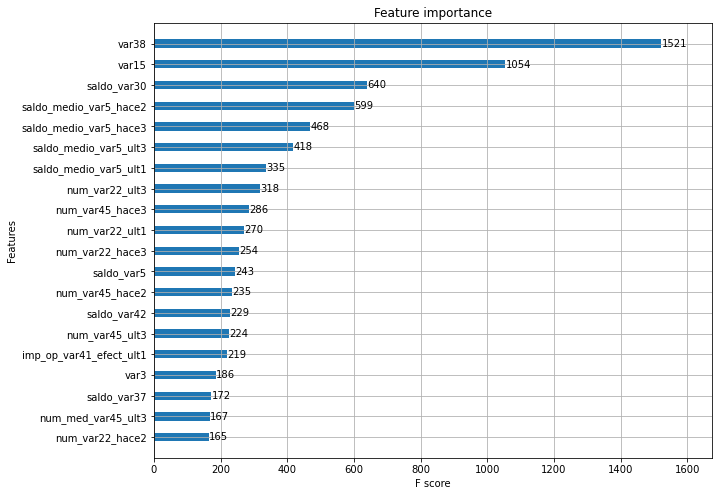

In [15]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

F score : 해당 feature가 트리를 split하는데 몇번 사용이 되는가, 얼마나 자주 사용되는가에 대한 지표

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [16]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC : {lgbm_roc_score:.4f}')

[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.802591	valid_0's binary_logloss: 0.15489
[3]	valid_0's auc: 0.803101	valid_0's binary_logloss: 0.151878
[4]	valid_0's auc: 0.805022	valid_0's binary_logloss: 0.149673
[5]	valid_0's auc: 0.809511	valid_0's binary_logloss: 0.147707
[6]	valid_0's auc: 0.81027	valid_0's binary_logloss: 0.146246
[7]	valid_0's auc: 0.815418	valid_0's binary_logloss: 0.144879
[8]	valid_0's auc: 0.817089	valid_0's binary_logloss: 0.14382
[9]	valid_0's auc: 0.818182	valid_0's binary_logloss: 0.142877
[10]	valid_0's auc: 0.818933	valid_0's binary_logloss: 0.142132
[11]	valid_0's auc: 0.819397	valid_0's binary_logloss: 0.141465
[12]	valid_0's auc: 0.820659	valid_0's binary_logloss: 0.140912
[13]	valid_0's auc: 0.821707	valid_0's binary_logloss: 0.140415
[14]	valid_0's auc: 0.821327	valid_0's binary_logloss: 0.140043
[15]	valid_0's auc: 0.821794	valid_0's binary_logloss:

In [22]:
from sklearn.model_selection import GridSearchCV

LGBM_clf = LGBMClassifier(n_estimators=200)

params={'num_leaves':[32,64],
       'max_depth':[128,160],
       'min_child_samples':[60,100],
       'subsample':[0.8,1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train),(X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')
print(f'ROC AUC: {lgbm_roc_score:.4f}')

[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978

[70]	valid_0's auc: 0.901902	valid_0's binary_logloss: 0.115031	valid_1's auc: 0.819508	valid_1's binary_logloss: 0.139614
[71]	valid_0's auc: 0.90223	valid_0's binary_logloss: 0.114874	valid_1's auc: 0.819065	valid_1's binary_logloss: 0.139703
[72]	valid_0's auc: 0.902466	valid_0's binary_logloss: 0.114737	valid_1's auc: 0.818815	valid_1's binary_logloss: 0.139772
Early stopping, best iteration is:
[42]	valid_0's auc: 0.889333	valid_0's binary_logloss: 0.120241	valid_1's auc: 0.823832	valid_1's binary_logloss: 0.138495
[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_lo

[25]	valid_0's auc: 0.875912	valid_0's binary_logloss: 0.125241	valid_1's auc: 0.8226	valid_1's binary_logloss: 0.13806
[26]	valid_0's auc: 0.877039	valid_0's binary_logloss: 0.124892	valid_1's auc: 0.822842	valid_1's binary_logloss: 0.137975
[27]	valid_0's auc: 0.87835	valid_0's binary_logloss: 0.124462	valid_1's auc: 0.822814	valid_1's binary_logloss: 0.13796
[28]	valid_0's auc: 0.879242	valid_0's binary_logloss: 0.12408	valid_1's auc: 0.822146	valid_1's binary_logloss: 0.138048
[29]	valid_0's auc: 0.880013	valid_0's binary_logloss: 0.123791	valid_1's auc: 0.821712	valid_1's binary_logloss: 0.138084
[30]	valid_0's auc: 0.880369	valid_0's binary_logloss: 0.123546	valid_1's auc: 0.821728	valid_1's binary_logloss: 0.138099
[31]	valid_0's auc: 0.881298	valid_0's binary_logloss: 0.12325	valid_1's auc: 0.821979	valid_1's binary_logloss: 0.138096
[32]	valid_0's auc: 0.881922	valid_0's binary_logloss: 0.12298	valid_1's auc: 0.822342	valid_1's binary_logloss: 0.13807
[33]	valid_0's auc: 0.882

[26]	valid_0's auc: 0.875985	valid_0's binary_logloss: 0.125043	valid_1's auc: 0.822851	valid_1's binary_logloss: 0.138232
[27]	valid_0's auc: 0.876698	valid_0's binary_logloss: 0.124723	valid_1's auc: 0.822401	valid_1's binary_logloss: 0.138165
[28]	valid_0's auc: 0.877753	valid_0's binary_logloss: 0.124379	valid_1's auc: 0.822584	valid_1's binary_logloss: 0.138172
[29]	valid_0's auc: 0.87851	valid_0's binary_logloss: 0.124078	valid_1's auc: 0.822038	valid_1's binary_logloss: 0.138176
[30]	valid_0's auc: 0.879666	valid_0's binary_logloss: 0.123721	valid_1's auc: 0.822226	valid_1's binary_logloss: 0.138162
[31]	valid_0's auc: 0.880464	valid_0's binary_logloss: 0.123431	valid_1's auc: 0.821535	valid_1's binary_logloss: 0.138184
[32]	valid_0's auc: 0.881319	valid_0's binary_logloss: 0.123097	valid_1's auc: 0.821382	valid_1's binary_logloss: 0.138256
[33]	valid_0's auc: 0.881841	valid_0's binary_logloss: 0.122867	valid_1's auc: 0.821361	valid_1's binary_logloss: 0.138315
[34]	valid_0's au

[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978

[72]	valid_0's auc: 0.902466	valid_0's binary_logloss: 0.114737	valid_1's auc: 0.818815	valid_1's binary_logloss: 0.139772
Early stopping, best iteration is:
[42]	valid_0's auc: 0.889333	valid_0's binary_logloss: 0.120241	valid_1's auc: 0.823832	valid_1's binary_logloss: 0.138495
[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logl

[25]	valid_0's auc: 0.875912	valid_0's binary_logloss: 0.125241	valid_1's auc: 0.8226	valid_1's binary_logloss: 0.13806
[26]	valid_0's auc: 0.877039	valid_0's binary_logloss: 0.124892	valid_1's auc: 0.822842	valid_1's binary_logloss: 0.137975
[27]	valid_0's auc: 0.87835	valid_0's binary_logloss: 0.124462	valid_1's auc: 0.822814	valid_1's binary_logloss: 0.13796
[28]	valid_0's auc: 0.879242	valid_0's binary_logloss: 0.12408	valid_1's auc: 0.822146	valid_1's binary_logloss: 0.138048
[29]	valid_0's auc: 0.880013	valid_0's binary_logloss: 0.123791	valid_1's auc: 0.821712	valid_1's binary_logloss: 0.138084
[30]	valid_0's auc: 0.880369	valid_0's binary_logloss: 0.123546	valid_1's auc: 0.821728	valid_1's binary_logloss: 0.138099
[31]	valid_0's auc: 0.881298	valid_0's binary_logloss: 0.12325	valid_1's auc: 0.821979	valid_1's binary_logloss: 0.138096
[32]	valid_0's auc: 0.881922	valid_0's binary_logloss: 0.12298	valid_1's auc: 0.822342	valid_1's binary_logloss: 0.13807
[33]	valid_0's auc: 0.882

[25]	valid_0's auc: 0.874793	valid_0's binary_logloss: 0.125457	valid_1's auc: 0.822706	valid_1's binary_logloss: 0.138283
[26]	valid_0's auc: 0.875985	valid_0's binary_logloss: 0.125043	valid_1's auc: 0.822851	valid_1's binary_logloss: 0.138232
[27]	valid_0's auc: 0.876698	valid_0's binary_logloss: 0.124723	valid_1's auc: 0.822401	valid_1's binary_logloss: 0.138165
[28]	valid_0's auc: 0.877753	valid_0's binary_logloss: 0.124379	valid_1's auc: 0.822584	valid_1's binary_logloss: 0.138172
[29]	valid_0's auc: 0.87851	valid_0's binary_logloss: 0.124078	valid_1's auc: 0.822038	valid_1's binary_logloss: 0.138176
[30]	valid_0's auc: 0.879666	valid_0's binary_logloss: 0.123721	valid_1's auc: 0.822226	valid_1's binary_logloss: 0.138162
[31]	valid_0's auc: 0.880464	valid_0's binary_logloss: 0.123431	valid_1's auc: 0.821535	valid_1's binary_logloss: 0.138184
[32]	valid_0's auc: 0.881319	valid_0's binary_logloss: 0.123097	valid_1's auc: 0.821382	valid_1's binary_logloss: 0.138256
[33]	valid_0's au

[48]	valid_0's auc: 0.892906	valid_0's binary_logloss: 0.118975	valid_1's auc: 0.817483	valid_1's binary_logloss: 0.139381
[49]	valid_0's auc: 0.89353	valid_0's binary_logloss: 0.11875	valid_1's auc: 0.817496	valid_1's binary_logloss: 0.139397
Early stopping, best iteration is:
[19]	valid_0's auc: 0.871011	valid_0's binary_logloss: 0.127803	valid_1's auc: 0.820873	valid_1's binary_logloss: 0.139314
[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss

[19]	valid_0's auc: 0.886806	valid_0's binary_logloss: 0.122685	valid_1's auc: 0.821659	valid_1's binary_logloss: 0.138755
[20]	valid_0's auc: 0.888564	valid_0's binary_logloss: 0.12203	valid_1's auc: 0.82164	valid_1's binary_logloss: 0.138654
[21]	valid_0's auc: 0.889459	valid_0's binary_logloss: 0.121403	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.138505
[22]	valid_0's auc: 0.891606	valid_0's binary_logloss: 0.120817	valid_1's auc: 0.822211	valid_1's binary_logloss: 0.138354
[23]	valid_0's auc: 0.892742	valid_0's binary_logloss: 0.120263	valid_1's auc: 0.822088	valid_1's binary_logloss: 0.13835
[24]	valid_0's auc: 0.893866	valid_0's binary_logloss: 0.119654	valid_1's auc: 0.822471	valid_1's binary_logloss: 0.138265
[25]	valid_0's auc: 0.894958	valid_0's binary_logloss: 0.119102	valid_1's auc: 0.822288	valid_1's binary_logloss: 0.138252
[26]	valid_0's auc: 0.895811	valid_0's binary_logloss: 0.118633	valid_1's auc: 0.822524	valid_1's binary_logloss: 0.138176
[27]	valid_0's auc:

[36]	valid_0's auc: 0.904275	valid_0's binary_logloss: 0.114566	valid_1's auc: 0.824378	valid_1's binary_logloss: 0.137781
[37]	valid_0's auc: 0.905343	valid_0's binary_logloss: 0.114233	valid_1's auc: 0.824678	valid_1's binary_logloss: 0.137735
[38]	valid_0's auc: 0.906056	valid_0's binary_logloss: 0.113868	valid_1's auc: 0.824304	valid_1's binary_logloss: 0.137774
[39]	valid_0's auc: 0.906761	valid_0's binary_logloss: 0.113506	valid_1's auc: 0.823829	valid_1's binary_logloss: 0.13789
[40]	valid_0's auc: 0.907423	valid_0's binary_logloss: 0.113131	valid_1's auc: 0.823587	valid_1's binary_logloss: 0.13795
[41]	valid_0's auc: 0.908076	valid_0's binary_logloss: 0.112801	valid_1's auc: 0.823087	valid_1's binary_logloss: 0.138119
[42]	valid_0's auc: 0.908842	valid_0's binary_logloss: 0.112445	valid_1's auc: 0.822419	valid_1's binary_logloss: 0.13831
[43]	valid_0's auc: 0.909482	valid_0's binary_logloss: 0.112107	valid_1's auc: 0.822086	valid_1's binary_logloss: 0.138424
[44]	valid_0's auc:

[52]	valid_0's auc: 0.914698	valid_0's binary_logloss: 0.109619	valid_1's auc: 0.816838	valid_1's binary_logloss: 0.140041
[53]	valid_0's auc: 0.915104	valid_0's binary_logloss: 0.109353	valid_1's auc: 0.816525	valid_1's binary_logloss: 0.140162
[54]	valid_0's auc: 0.915779	valid_0's binary_logloss: 0.109028	valid_1's auc: 0.816479	valid_1's binary_logloss: 0.14022
[55]	valid_0's auc: 0.916035	valid_0's binary_logloss: 0.10879	valid_1's auc: 0.816271	valid_1's binary_logloss: 0.14031
[56]	valid_0's auc: 0.916321	valid_0's binary_logloss: 0.108555	valid_1's auc: 0.815935	valid_1's binary_logloss: 0.140413
[57]	valid_0's auc: 0.916702	valid_0's binary_logloss: 0.108315	valid_1's auc: 0.815608	valid_1's binary_logloss: 0.140515
Early stopping, best iteration is:
[27]	valid_0's auc: 0.894334	valid_0's binary_logloss: 0.118773	valid_1's auc: 0.821557	valid_1's binary_logloss: 0.138459
[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_log

[17]	valid_0's auc: 0.880762	valid_0's binary_logloss: 0.12451	valid_1's auc: 0.822751	valid_1's binary_logloss: 0.139176
[18]	valid_0's auc: 0.882453	valid_0's binary_logloss: 0.123755	valid_1's auc: 0.823621	valid_1's binary_logloss: 0.13895
[19]	valid_0's auc: 0.8849	valid_0's binary_logloss: 0.12299	valid_1's auc: 0.823346	valid_1's binary_logloss: 0.138806
[20]	valid_0's auc: 0.887083	valid_0's binary_logloss: 0.122272	valid_1's auc: 0.823533	valid_1's binary_logloss: 0.138678
[21]	valid_0's auc: 0.888566	valid_0's binary_logloss: 0.121612	valid_1's auc: 0.823935	valid_1's binary_logloss: 0.138523
[22]	valid_0's auc: 0.890245	valid_0's binary_logloss: 0.12094	valid_1's auc: 0.823848	valid_1's binary_logloss: 0.138529
[23]	valid_0's auc: 0.891986	valid_0's binary_logloss: 0.120302	valid_1's auc: 0.824283	valid_1's binary_logloss: 0.138378
[24]	valid_0's auc: 0.893599	valid_0's binary_logloss: 0.119667	valid_1's auc: 0.824682	valid_1's binary_logloss: 0.138326
[25]	valid_0's auc: 0.

[36]	valid_0's auc: 0.906625	valid_0's binary_logloss: 0.11413	valid_1's auc: 0.823616	valid_1's binary_logloss: 0.138126
[37]	valid_0's auc: 0.907524	valid_0's binary_logloss: 0.11373	valid_1's auc: 0.823648	valid_1's binary_logloss: 0.138122
[38]	valid_0's auc: 0.908298	valid_0's binary_logloss: 0.113339	valid_1's auc: 0.823221	valid_1's binary_logloss: 0.138238
[39]	valid_0's auc: 0.909019	valid_0's binary_logloss: 0.112977	valid_1's auc: 0.823416	valid_1's binary_logloss: 0.138284
[40]	valid_0's auc: 0.909675	valid_0's binary_logloss: 0.112622	valid_1's auc: 0.823271	valid_1's binary_logloss: 0.138359
[41]	valid_0's auc: 0.910586	valid_0's binary_logloss: 0.112219	valid_1's auc: 0.823374	valid_1's binary_logloss: 0.1384
[42]	valid_0's auc: 0.91166	valid_0's binary_logloss: 0.111879	valid_1's auc: 0.82316	valid_1's binary_logloss: 0.138469
[43]	valid_0's auc: 0.912372	valid_0's binary_logloss: 0.111519	valid_1's auc: 0.822789	valid_1's binary_logloss: 0.13862
[44]	valid_0's auc: 0.9

[54]	valid_0's auc: 0.916025	valid_0's binary_logloss: 0.108661	valid_1's auc: 0.819197	valid_1's binary_logloss: 0.139332
[55]	valid_0's auc: 0.916313	valid_0's binary_logloss: 0.108406	valid_1's auc: 0.819115	valid_1's binary_logloss: 0.139419
[56]	valid_0's auc: 0.916963	valid_0's binary_logloss: 0.1081	valid_1's auc: 0.819301	valid_1's binary_logloss: 0.13941
[57]	valid_0's auc: 0.917416	valid_0's binary_logloss: 0.107834	valid_1's auc: 0.81876	valid_1's binary_logloss: 0.139536
Early stopping, best iteration is:
[27]	valid_0's auc: 0.89559	valid_0's binary_logloss: 0.118436	valid_1's auc: 0.825563	valid_1's binary_logloss: 0.137317
[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_logloss: 0.158902
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846591	valid_0's binary_logloss: 0.150596	valid_1's auc: 0.804786	valid_1's binary_logloss: 0.154475
[3]	valid_0's auc: 0.849399	valid_0's binary_loglos

[19]	valid_0's auc: 0.885876	valid_0's binary_logloss: 0.122867	valid_1's auc: 0.820665	valid_1's binary_logloss: 0.139153
[20]	valid_0's auc: 0.887975	valid_0's binary_logloss: 0.122156	valid_1's auc: 0.819985	valid_1's binary_logloss: 0.139138
[21]	valid_0's auc: 0.889396	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.819777	valid_1's binary_logloss: 0.139096
[22]	valid_0's auc: 0.890658	valid_0's binary_logloss: 0.120954	valid_1's auc: 0.820179	valid_1's binary_logloss: 0.139047
[23]	valid_0's auc: 0.891916	valid_0's binary_logloss: 0.120363	valid_1's auc: 0.820529	valid_1's binary_logloss: 0.138877
[24]	valid_0's auc: 0.893146	valid_0's binary_logloss: 0.119824	valid_1's auc: 0.820868	valid_1's binary_logloss: 0.138853
[25]	valid_0's auc: 0.894642	valid_0's binary_logloss: 0.119252	valid_1's auc: 0.821099	valid_1's binary_logloss: 0.138735
[26]	valid_0's auc: 0.896218	valid_0's binary_logloss: 0.118682	valid_1's auc: 0.821606	valid_1's binary_logloss: 0.138634
[27]	valid_0's a

[44]	valid_0's auc: 0.88786	valid_0's binary_logloss: 0.121046	valid_1's auc: 0.824043	valid_1's binary_logloss: 0.138007
[45]	valid_0's auc: 0.888351	valid_0's binary_logloss: 0.120827	valid_1's auc: 0.823682	valid_1's binary_logloss: 0.138102
[46]	valid_0's auc: 0.888874	valid_0's binary_logloss: 0.120614	valid_1's auc: 0.823777	valid_1's binary_logloss: 0.138093
[47]	valid_0's auc: 0.889412	valid_0's binary_logloss: 0.120432	valid_1's auc: 0.823612	valid_1's binary_logloss: 0.138118
[48]	valid_0's auc: 0.889873	valid_0's binary_logloss: 0.120238	valid_1's auc: 0.823481	valid_1's binary_logloss: 0.138152
[49]	valid_0's auc: 0.890308	valid_0's binary_logloss: 0.120039	valid_1's auc: 0.823115	valid_1's binary_logloss: 0.13824
[50]	valid_0's auc: 0.890685	valid_0's binary_logloss: 0.119838	valid_1's auc: 0.822982	valid_1's binary_logloss: 0.138272
[51]	valid_0's auc: 0.891018	valid_0's binary_logloss: 0.119677	valid_1's auc: 0.822939	valid_1's binary_logloss: 0.138311
[52]	valid_0's auc

[42]	valid_0's auc: 0.886292	valid_0's binary_logloss: 0.121586	valid_1's auc: 0.823171	valid_1's binary_logloss: 0.137939
[43]	valid_0's auc: 0.886945	valid_0's binary_logloss: 0.121369	valid_1's auc: 0.823256	valid_1's binary_logloss: 0.137936
[44]	valid_0's auc: 0.887554	valid_0's binary_logloss: 0.121166	valid_1's auc: 0.822993	valid_1's binary_logloss: 0.138016
[45]	valid_0's auc: 0.888029	valid_0's binary_logloss: 0.120958	valid_1's auc: 0.822654	valid_1's binary_logloss: 0.138107
[46]	valid_0's auc: 0.888634	valid_0's binary_logloss: 0.120735	valid_1's auc: 0.822778	valid_1's binary_logloss: 0.138138
[47]	valid_0's auc: 0.88918	valid_0's binary_logloss: 0.120551	valid_1's auc: 0.822914	valid_1's binary_logloss: 0.138129
[48]	valid_0's auc: 0.889666	valid_0's binary_logloss: 0.120376	valid_1's auc: 0.823013	valid_1's binary_logloss: 0.138146
[49]	valid_0's auc: 0.890374	valid_0's binary_logloss: 0.120095	valid_1's auc: 0.822726	valid_1's binary_logloss: 0.138209
[50]	valid_0's au

[46]	valid_0's auc: 0.88876	valid_0's binary_logloss: 0.120445	valid_1's auc: 0.824509	valid_1's binary_logloss: 0.137786
[47]	valid_0's auc: 0.889462	valid_0's binary_logloss: 0.120235	valid_1's auc: 0.82427	valid_1's binary_logloss: 0.137824
[48]	valid_0's auc: 0.889906	valid_0's binary_logloss: 0.120017	valid_1's auc: 0.82388	valid_1's binary_logloss: 0.137877
[49]	valid_0's auc: 0.890495	valid_0's binary_logloss: 0.119834	valid_1's auc: 0.823776	valid_1's binary_logloss: 0.137884
[50]	valid_0's auc: 0.890964	valid_0's binary_logloss: 0.119624	valid_1's auc: 0.823748	valid_1's binary_logloss: 0.137918
[51]	valid_0's auc: 0.891488	valid_0's binary_logloss: 0.119438	valid_1's auc: 0.823635	valid_1's binary_logloss: 0.137994
[52]	valid_0's auc: 0.892217	valid_0's binary_logloss: 0.119161	valid_1's auc: 0.823285	valid_1's binary_logloss: 0.138047
[53]	valid_0's auc: 0.892625	valid_0's binary_logloss: 0.118963	valid_1's auc: 0.823009	valid_1's binary_logloss: 0.138108
[54]	valid_0's auc:

[47]	valid_0's auc: 0.887521	valid_0's binary_logloss: 0.120705	valid_1's auc: 0.820115	valid_1's binary_logloss: 0.138459
[48]	valid_0's auc: 0.888027	valid_0's binary_logloss: 0.12049	valid_1's auc: 0.819811	valid_1's binary_logloss: 0.13853
[49]	valid_0's auc: 0.888469	valid_0's binary_logloss: 0.120283	valid_1's auc: 0.819831	valid_1's binary_logloss: 0.138526
[50]	valid_0's auc: 0.889194	valid_0's binary_logloss: 0.120102	valid_1's auc: 0.819753	valid_1's binary_logloss: 0.138542
[51]	valid_0's auc: 0.889795	valid_0's binary_logloss: 0.119931	valid_1's auc: 0.81971	valid_1's binary_logloss: 0.138542
[52]	valid_0's auc: 0.890598	valid_0's binary_logloss: 0.119683	valid_1's auc: 0.819603	valid_1's binary_logloss: 0.138584
[53]	valid_0's auc: 0.891186	valid_0's binary_logloss: 0.119451	valid_1's auc: 0.818941	valid_1's binary_logloss: 0.138707
[54]	valid_0's auc: 0.891534	valid_0's binary_logloss: 0.119256	valid_1's auc: 0.818935	valid_1's binary_logloss: 0.13869
[55]	valid_0's auc: 

[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.81804

[68]	valid_0's auc: 0.897453	valid_0's binary_logloss: 0.11686	valid_1's auc: 0.820388	valid_1's binary_logloss: 0.139067
[69]	valid_0's auc: 0.897805	valid_0's binary_logloss: 0.1167	valid_1's auc: 0.820539	valid_1's binary_logloss: 0.139047
[70]	valid_0's auc: 0.898011	valid_0's binary_logloss: 0.116567	valid_1's auc: 0.820444	valid_1's binary_logloss: 0.139124
[71]	valid_0's auc: 0.898276	valid_0's binary_logloss: 0.116447	valid_1's auc: 0.820174	valid_1's binary_logloss: 0.139188
Early stopping, best iteration is:
[41]	valid_0's auc: 0.885703	valid_0's binary_logloss: 0.121725	valid_1's auc: 0.825588	valid_1's binary_logloss: 0.137723
[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logl

[68]	valid_0's auc: 0.898838	valid_0's binary_logloss: 0.116735	valid_1's auc: 0.819297	valid_1's binary_logloss: 0.139283
[69]	valid_0's auc: 0.899122	valid_0's binary_logloss: 0.116582	valid_1's auc: 0.818942	valid_1's binary_logloss: 0.13934
[70]	valid_0's auc: 0.899393	valid_0's binary_logloss: 0.116431	valid_1's auc: 0.818775	valid_1's binary_logloss: 0.139419
Early stopping, best iteration is:
[40]	valid_0's auc: 0.884938	valid_0's binary_logloss: 0.122081	valid_1's auc: 0.823736	valid_1's binary_logloss: 0.137777
[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_lo

[65]	valid_0's auc: 0.897963	valid_0's binary_logloss: 0.116755	valid_1's auc: 0.821532	valid_1's binary_logloss: 0.138547
[66]	valid_0's auc: 0.898378	valid_0's binary_logloss: 0.116571	valid_1's auc: 0.821321	valid_1's binary_logloss: 0.138611
Early stopping, best iteration is:
[36]	valid_0's auc: 0.882745	valid_0's binary_logloss: 0.122805	valid_1's auc: 0.82542	valid_1's binary_logloss: 0.137512
[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_loglo

[25]	valid_0's auc: 0.87426	valid_0's binary_logloss: 0.126022	valid_1's auc: 0.821252	valid_1's binary_logloss: 0.138465
[26]	valid_0's auc: 0.87513	valid_0's binary_logloss: 0.125709	valid_1's auc: 0.821518	valid_1's binary_logloss: 0.1384
[27]	valid_0's auc: 0.87569	valid_0's binary_logloss: 0.125383	valid_1's auc: 0.821042	valid_1's binary_logloss: 0.138472
[28]	valid_0's auc: 0.876486	valid_0's binary_logloss: 0.12505	valid_1's auc: 0.820714	valid_1's binary_logloss: 0.138443
[29]	valid_0's auc: 0.877465	valid_0's binary_logloss: 0.124734	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.138429
[30]	valid_0's auc: 0.878124	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.821542	valid_1's binary_logloss: 0.138385
[31]	valid_0's auc: 0.878882	valid_0's binary_logloss: 0.124095	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.138357
[32]	valid_0's auc: 0.87945	valid_0's binary_logloss: 0.123836	valid_1's auc: 0.821299	valid_1's binary_logloss: 0.138432
[33]	valid_0's auc: 0.8

[51]	valid_0's auc: 0.912175	valid_0's binary_logloss: 0.111019	valid_1's auc: 0.816967	valid_1's binary_logloss: 0.139967
Early stopping, best iteration is:
[21]	valid_0's auc: 0.884858	valid_0's binary_logloss: 0.123187	valid_1's auc: 0.822509	valid_1's binary_logloss: 0.138659
[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss:

[19]	valid_0's auc: 0.883138	valid_0's binary_logloss: 0.124292	valid_1's auc: 0.824749	valid_1's binary_logloss: 0.137828
[20]	valid_0's auc: 0.884406	valid_0's binary_logloss: 0.123659	valid_1's auc: 0.825687	valid_1's binary_logloss: 0.137597
[21]	valid_0's auc: 0.885418	valid_0's binary_logloss: 0.123082	valid_1's auc: 0.825432	valid_1's binary_logloss: 0.137552
[22]	valid_0's auc: 0.886897	valid_0's binary_logloss: 0.122505	valid_1's auc: 0.825444	valid_1's binary_logloss: 0.137445
[23]	valid_0's auc: 0.887892	valid_0's binary_logloss: 0.12194	valid_1's auc: 0.825527	valid_1's binary_logloss: 0.137364
[24]	valid_0's auc: 0.888875	valid_0's binary_logloss: 0.121437	valid_1's auc: 0.82529	valid_1's binary_logloss: 0.137354
[25]	valid_0's auc: 0.890516	valid_0's binary_logloss: 0.120869	valid_1's auc: 0.825275	valid_1's binary_logloss: 0.137304
[26]	valid_0's auc: 0.891651	valid_0's binary_logloss: 0.120363	valid_1's auc: 0.824785	valid_1's binary_logloss: 0.137303
[27]	valid_0's auc

[37]	valid_0's auc: 0.902337	valid_0's binary_logloss: 0.115842	valid_1's auc: 0.820708	valid_1's binary_logloss: 0.138538
[38]	valid_0's auc: 0.903507	valid_0's binary_logloss: 0.115507	valid_1's auc: 0.820557	valid_1's binary_logloss: 0.138521
[39]	valid_0's auc: 0.904343	valid_0's binary_logloss: 0.11519	valid_1's auc: 0.820352	valid_1's binary_logloss: 0.138587
[40]	valid_0's auc: 0.90537	valid_0's binary_logloss: 0.114842	valid_1's auc: 0.820681	valid_1's binary_logloss: 0.138553
[41]	valid_0's auc: 0.906168	valid_0's binary_logloss: 0.114469	valid_1's auc: 0.820339	valid_1's binary_logloss: 0.138642
[42]	valid_0's auc: 0.9069	valid_0's binary_logloss: 0.114109	valid_1's auc: 0.819639	valid_1's binary_logloss: 0.138752
[43]	valid_0's auc: 0.90754	valid_0's binary_logloss: 0.113721	valid_1's auc: 0.81924	valid_1's binary_logloss: 0.138829
[44]	valid_0's auc: 0.908121	valid_0's binary_logloss: 0.113368	valid_1's auc: 0.819144	valid_1's binary_logloss: 0.138911
[45]	valid_0's auc: 0.

[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	val

[19]	valid_0's auc: 0.883286	valid_0's binary_logloss: 0.124409	valid_1's auc: 0.822091	valid_1's binary_logloss: 0.138559
[20]	valid_0's auc: 0.884199	valid_0's binary_logloss: 0.123805	valid_1's auc: 0.8223	valid_1's binary_logloss: 0.138383
[21]	valid_0's auc: 0.885172	valid_0's binary_logloss: 0.123206	valid_1's auc: 0.822751	valid_1's binary_logloss: 0.138261
[22]	valid_0's auc: 0.886847	valid_0's binary_logloss: 0.122581	valid_1's auc: 0.823414	valid_1's binary_logloss: 0.138123
[23]	valid_0's auc: 0.888548	valid_0's binary_logloss: 0.121956	valid_1's auc: 0.8239	valid_1's binary_logloss: 0.137941
[24]	valid_0's auc: 0.890266	valid_0's binary_logloss: 0.121393	valid_1's auc: 0.823748	valid_1's binary_logloss: 0.137916
[25]	valid_0's auc: 0.891541	valid_0's binary_logloss: 0.120841	valid_1's auc: 0.823182	valid_1's binary_logloss: 0.137946
[26]	valid_0's auc: 0.892631	valid_0's binary_logloss: 0.120321	valid_1's auc: 0.822606	valid_1's binary_logloss: 0.138009
[27]	valid_0's auc: 

[36]	valid_0's auc: 0.90165	valid_0's binary_logloss: 0.116016	valid_1's auc: 0.823984	valid_1's binary_logloss: 0.137627
[37]	valid_0's auc: 0.902383	valid_0's binary_logloss: 0.115642	valid_1's auc: 0.82405	valid_1's binary_logloss: 0.137619
[38]	valid_0's auc: 0.903119	valid_0's binary_logloss: 0.11527	valid_1's auc: 0.823694	valid_1's binary_logloss: 0.137762
[39]	valid_0's auc: 0.903853	valid_0's binary_logloss: 0.114895	valid_1's auc: 0.823481	valid_1's binary_logloss: 0.137857
[40]	valid_0's auc: 0.904939	valid_0's binary_logloss: 0.114483	valid_1's auc: 0.823925	valid_1's binary_logloss: 0.137838
[41]	valid_0's auc: 0.905791	valid_0's binary_logloss: 0.114127	valid_1's auc: 0.823238	valid_1's binary_logloss: 0.137973
[42]	valid_0's auc: 0.906584	valid_0's binary_logloss: 0.113766	valid_1's auc: 0.822949	valid_1's binary_logloss: 0.138101
[43]	valid_0's auc: 0.90744	valid_0's binary_logloss: 0.113389	valid_1's auc: 0.822518	valid_1's binary_logloss: 0.138207
[44]	valid_0's auc: 

[52]	valid_0's auc: 0.912476	valid_0's binary_logloss: 0.110863	valid_1's auc: 0.815648	valid_1's binary_logloss: 0.139859
[53]	valid_0's auc: 0.913104	valid_0's binary_logloss: 0.110571	valid_1's auc: 0.815874	valid_1's binary_logloss: 0.139881
[54]	valid_0's auc: 0.91369	valid_0's binary_logloss: 0.110346	valid_1's auc: 0.816054	valid_1's binary_logloss: 0.139879
[55]	valid_0's auc: 0.914203	valid_0's binary_logloss: 0.110073	valid_1's auc: 0.816244	valid_1's binary_logloss: 0.139882
[56]	valid_0's auc: 0.914661	valid_0's binary_logloss: 0.109813	valid_1's auc: 0.815649	valid_1's binary_logloss: 0.140034
[57]	valid_0's auc: 0.914859	valid_0's binary_logloss: 0.109608	valid_1's auc: 0.815492	valid_1's binary_logloss: 0.140094
[58]	valid_0's auc: 0.91533	valid_0's binary_logloss: 0.109347	valid_1's auc: 0.815113	valid_1's binary_logloss: 0.140224
[59]	valid_0's auc: 0.915574	valid_0's binary_logloss: 0.109123	valid_1's auc: 0.814872	valid_1's binary_logloss: 0.140292
[60]	valid_0's auc

[27]	valid_0's auc: 0.876894	valid_0's binary_logloss: 0.124509	valid_1's auc: 0.8217	valid_1's binary_logloss: 0.138923
[28]	valid_0's auc: 0.877671	valid_0's binary_logloss: 0.124189	valid_1's auc: 0.821238	valid_1's binary_logloss: 0.138907
[29]	valid_0's auc: 0.878719	valid_0's binary_logloss: 0.123877	valid_1's auc: 0.821866	valid_1's binary_logloss: 0.138808
[30]	valid_0's auc: 0.879801	valid_0's binary_logloss: 0.123568	valid_1's auc: 0.821592	valid_1's binary_logloss: 0.138822
[31]	valid_0's auc: 0.880405	valid_0's binary_logloss: 0.12331	valid_1's auc: 0.821859	valid_1's binary_logloss: 0.138744
[32]	valid_0's auc: 0.881531	valid_0's binary_logloss: 0.122969	valid_1's auc: 0.822045	valid_1's binary_logloss: 0.138708
[33]	valid_0's auc: 0.882612	valid_0's binary_logloss: 0.122649	valid_1's auc: 0.822225	valid_1's binary_logloss: 0.13868
[34]	valid_0's auc: 0.88346	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.822152	valid_1's binary_logloss: 0.138655
[35]	valid_0's auc: 0

[25]	valid_0's auc: 0.874938	valid_0's binary_logloss: 0.125441	valid_1's auc: 0.820701	valid_1's binary_logloss: 0.138318
[26]	valid_0's auc: 0.87604	valid_0's binary_logloss: 0.12504	valid_1's auc: 0.821142	valid_1's binary_logloss: 0.138204
[27]	valid_0's auc: 0.877053	valid_0's binary_logloss: 0.124703	valid_1's auc: 0.820939	valid_1's binary_logloss: 0.1382
[28]	valid_0's auc: 0.878239	valid_0's binary_logloss: 0.124304	valid_1's auc: 0.821067	valid_1's binary_logloss: 0.138193
[29]	valid_0's auc: 0.879209	valid_0's binary_logloss: 0.12397	valid_1's auc: 0.821386	valid_1's binary_logloss: 0.138207
[30]	valid_0's auc: 0.879859	valid_0's binary_logloss: 0.123688	valid_1's auc: 0.821709	valid_1's binary_logloss: 0.138173
[31]	valid_0's auc: 0.880704	valid_0's binary_logloss: 0.123366	valid_1's auc: 0.821079	valid_1's binary_logloss: 0.138197
[32]	valid_0's auc: 0.881361	valid_0's binary_logloss: 0.123106	valid_1's auc: 0.821248	valid_1's binary_logloss: 0.138155
[33]	valid_0's auc: 0

[49]	valid_0's auc: 0.893426	valid_0's binary_logloss: 0.118747	valid_1's auc: 0.823257	valid_1's binary_logloss: 0.138016
[50]	valid_0's auc: 0.894134	valid_0's binary_logloss: 0.118467	valid_1's auc: 0.823304	valid_1's binary_logloss: 0.138047
[51]	valid_0's auc: 0.894619	valid_0's binary_logloss: 0.118259	valid_1's auc: 0.823176	valid_1's binary_logloss: 0.138082
[52]	valid_0's auc: 0.895296	valid_0's binary_logloss: 0.118104	valid_1's auc: 0.823535	valid_1's binary_logloss: 0.138037
[53]	valid_0's auc: 0.896067	valid_0's binary_logloss: 0.117815	valid_1's auc: 0.823944	valid_1's binary_logloss: 0.138017
[54]	valid_0's auc: 0.89655	valid_0's binary_logloss: 0.117634	valid_1's auc: 0.823798	valid_1's binary_logloss: 0.13805
[55]	valid_0's auc: 0.897004	valid_0's binary_logloss: 0.117446	valid_1's auc: 0.823508	valid_1's binary_logloss: 0.138131
[56]	valid_0's auc: 0.897625	valid_0's binary_logloss: 0.117222	valid_1's auc: 0.823357	valid_1's binary_logloss: 0.138164
[57]	valid_0's auc

[48]	valid_0's auc: 0.890433	valid_0's binary_logloss: 0.119524	valid_1's auc: 0.821984	valid_1's binary_logloss: 0.138281
[49]	valid_0's auc: 0.890976	valid_0's binary_logloss: 0.119304	valid_1's auc: 0.821658	valid_1's binary_logloss: 0.138358
[50]	valid_0's auc: 0.891682	valid_0's binary_logloss: 0.119072	valid_1's auc: 0.821452	valid_1's binary_logloss: 0.1384
[51]	valid_0's auc: 0.892167	valid_0's binary_logloss: 0.118875	valid_1's auc: 0.821381	valid_1's binary_logloss: 0.138462
[52]	valid_0's auc: 0.892516	valid_0's binary_logloss: 0.118689	valid_1's auc: 0.821278	valid_1's binary_logloss: 0.138481
[53]	valid_0's auc: 0.893047	valid_0's binary_logloss: 0.118465	valid_1's auc: 0.821183	valid_1's binary_logloss: 0.138514
Early stopping, best iteration is:
[23]	valid_0's auc: 0.872683	valid_0's binary_logloss: 0.1262	valid_1's auc: 0.823076	valid_1's binary_logloss: 0.138323
[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logl

[25]	valid_0's auc: 0.874867	valid_0's binary_logloss: 0.125228	valid_1's auc: 0.82191	valid_1's binary_logloss: 0.138945
[26]	valid_0's auc: 0.875684	valid_0's binary_logloss: 0.124888	valid_1's auc: 0.822033	valid_1's binary_logloss: 0.138933
[27]	valid_0's auc: 0.876894	valid_0's binary_logloss: 0.124509	valid_1's auc: 0.8217	valid_1's binary_logloss: 0.138923
[28]	valid_0's auc: 0.877671	valid_0's binary_logloss: 0.124189	valid_1's auc: 0.821238	valid_1's binary_logloss: 0.138907
[29]	valid_0's auc: 0.878719	valid_0's binary_logloss: 0.123877	valid_1's auc: 0.821866	valid_1's binary_logloss: 0.138808
[30]	valid_0's auc: 0.879801	valid_0's binary_logloss: 0.123568	valid_1's auc: 0.821592	valid_1's binary_logloss: 0.138822
[31]	valid_0's auc: 0.880405	valid_0's binary_logloss: 0.12331	valid_1's auc: 0.821859	valid_1's binary_logloss: 0.138744
[32]	valid_0's auc: 0.881531	valid_0's binary_logloss: 0.122969	valid_1's auc: 0.822045	valid_1's binary_logloss: 0.138708
[33]	valid_0's auc: 

[26]	valid_0's auc: 0.87604	valid_0's binary_logloss: 0.12504	valid_1's auc: 0.821142	valid_1's binary_logloss: 0.138204
[27]	valid_0's auc: 0.877053	valid_0's binary_logloss: 0.124703	valid_1's auc: 0.820939	valid_1's binary_logloss: 0.1382
[28]	valid_0's auc: 0.878239	valid_0's binary_logloss: 0.124304	valid_1's auc: 0.821067	valid_1's binary_logloss: 0.138193
[29]	valid_0's auc: 0.879209	valid_0's binary_logloss: 0.12397	valid_1's auc: 0.821386	valid_1's binary_logloss: 0.138207
[30]	valid_0's auc: 0.879859	valid_0's binary_logloss: 0.123688	valid_1's auc: 0.821709	valid_1's binary_logloss: 0.138173
[31]	valid_0's auc: 0.880704	valid_0's binary_logloss: 0.123366	valid_1's auc: 0.821079	valid_1's binary_logloss: 0.138197
[32]	valid_0's auc: 0.881361	valid_0's binary_logloss: 0.123106	valid_1's auc: 0.821248	valid_1's binary_logloss: 0.138155
[33]	valid_0's auc: 0.882161	valid_0's binary_logloss: 0.122788	valid_1's auc: 0.820971	valid_1's binary_logloss: 0.138197
[34]	valid_0's auc: 0

[51]	valid_0's auc: 0.894619	valid_0's binary_logloss: 0.118259	valid_1's auc: 0.823176	valid_1's binary_logloss: 0.138082
[52]	valid_0's auc: 0.895296	valid_0's binary_logloss: 0.118104	valid_1's auc: 0.823535	valid_1's binary_logloss: 0.138037
[53]	valid_0's auc: 0.896067	valid_0's binary_logloss: 0.117815	valid_1's auc: 0.823944	valid_1's binary_logloss: 0.138017
[54]	valid_0's auc: 0.89655	valid_0's binary_logloss: 0.117634	valid_1's auc: 0.823798	valid_1's binary_logloss: 0.13805
[55]	valid_0's auc: 0.897004	valid_0's binary_logloss: 0.117446	valid_1's auc: 0.823508	valid_1's binary_logloss: 0.138131
[56]	valid_0's auc: 0.897625	valid_0's binary_logloss: 0.117222	valid_1's auc: 0.823357	valid_1's binary_logloss: 0.138164
[57]	valid_0's auc: 0.898173	valid_0's binary_logloss: 0.11706	valid_1's auc: 0.823194	valid_1's binary_logloss: 0.1382
[58]	valid_0's auc: 0.898599	valid_0's binary_logloss: 0.116846	valid_1's auc: 0.823178	valid_1's binary_logloss: 0.138205
[59]	valid_0's auc: 0

[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	v

[18]	valid_0's auc: 0.882453	valid_0's binary_logloss: 0.123755	valid_1's auc: 0.823621	valid_1's binary_logloss: 0.13895
[19]	valid_0's auc: 0.8849	valid_0's binary_logloss: 0.12299	valid_1's auc: 0.823346	valid_1's binary_logloss: 0.138806
[20]	valid_0's auc: 0.887083	valid_0's binary_logloss: 0.122272	valid_1's auc: 0.823533	valid_1's binary_logloss: 0.138678
[21]	valid_0's auc: 0.888566	valid_0's binary_logloss: 0.121612	valid_1's auc: 0.823935	valid_1's binary_logloss: 0.138523
[22]	valid_0's auc: 0.890245	valid_0's binary_logloss: 0.12094	valid_1's auc: 0.823848	valid_1's binary_logloss: 0.138529
[23]	valid_0's auc: 0.891986	valid_0's binary_logloss: 0.120302	valid_1's auc: 0.824283	valid_1's binary_logloss: 0.138378
[24]	valid_0's auc: 0.893599	valid_0's binary_logloss: 0.119667	valid_1's auc: 0.824682	valid_1's binary_logloss: 0.138326
[25]	valid_0's auc: 0.894607	valid_0's binary_logloss: 0.119145	valid_1's auc: 0.82447	valid_1's binary_logloss: 0.138357
[26]	valid_0's auc: 0.

[36]	valid_0's auc: 0.906625	valid_0's binary_logloss: 0.11413	valid_1's auc: 0.823616	valid_1's binary_logloss: 0.138126
[37]	valid_0's auc: 0.907524	valid_0's binary_logloss: 0.11373	valid_1's auc: 0.823648	valid_1's binary_logloss: 0.138122
[38]	valid_0's auc: 0.908298	valid_0's binary_logloss: 0.113339	valid_1's auc: 0.823221	valid_1's binary_logloss: 0.138238
[39]	valid_0's auc: 0.909019	valid_0's binary_logloss: 0.112977	valid_1's auc: 0.823416	valid_1's binary_logloss: 0.138284
[40]	valid_0's auc: 0.909675	valid_0's binary_logloss: 0.112622	valid_1's auc: 0.823271	valid_1's binary_logloss: 0.138359
[41]	valid_0's auc: 0.910586	valid_0's binary_logloss: 0.112219	valid_1's auc: 0.823374	valid_1's binary_logloss: 0.1384
[42]	valid_0's auc: 0.91166	valid_0's binary_logloss: 0.111879	valid_1's auc: 0.82316	valid_1's binary_logloss: 0.138469
[43]	valid_0's auc: 0.912372	valid_0's binary_logloss: 0.111519	valid_1's auc: 0.822789	valid_1's binary_logloss: 0.13862
[44]	valid_0's auc: 0.9

[52]	valid_0's auc: 0.914869	valid_0's binary_logloss: 0.109257	valid_1's auc: 0.819673	valid_1's binary_logloss: 0.139125
[53]	valid_0's auc: 0.915475	valid_0's binary_logloss: 0.108969	valid_1's auc: 0.819625	valid_1's binary_logloss: 0.139199
[54]	valid_0's auc: 0.916025	valid_0's binary_logloss: 0.108661	valid_1's auc: 0.819197	valid_1's binary_logloss: 0.139332
[55]	valid_0's auc: 0.916313	valid_0's binary_logloss: 0.108406	valid_1's auc: 0.819115	valid_1's binary_logloss: 0.139419
[56]	valid_0's auc: 0.916963	valid_0's binary_logloss: 0.1081	valid_1's auc: 0.819301	valid_1's binary_logloss: 0.13941
[57]	valid_0's auc: 0.917416	valid_0's binary_logloss: 0.107834	valid_1's auc: 0.81876	valid_1's binary_logloss: 0.139536
Early stopping, best iteration is:
[27]	valid_0's auc: 0.89559	valid_0's binary_logloss: 0.118436	valid_1's auc: 0.825563	valid_1's binary_logloss: 0.137317
[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_loglos

[19]	valid_0's auc: 0.885876	valid_0's binary_logloss: 0.122867	valid_1's auc: 0.820665	valid_1's binary_logloss: 0.139153
[20]	valid_0's auc: 0.887975	valid_0's binary_logloss: 0.122156	valid_1's auc: 0.819985	valid_1's binary_logloss: 0.139138
[21]	valid_0's auc: 0.889396	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.819777	valid_1's binary_logloss: 0.139096
[22]	valid_0's auc: 0.890658	valid_0's binary_logloss: 0.120954	valid_1's auc: 0.820179	valid_1's binary_logloss: 0.139047
[23]	valid_0's auc: 0.891916	valid_0's binary_logloss: 0.120363	valid_1's auc: 0.820529	valid_1's binary_logloss: 0.138877
[24]	valid_0's auc: 0.893146	valid_0's binary_logloss: 0.119824	valid_1's auc: 0.820868	valid_1's binary_logloss: 0.138853
[25]	valid_0's auc: 0.894642	valid_0's binary_logloss: 0.119252	valid_1's auc: 0.821099	valid_1's binary_logloss: 0.138735
[26]	valid_0's auc: 0.896218	valid_0's binary_logloss: 0.118682	valid_1's auc: 0.821606	valid_1's binary_logloss: 0.138634
[27]	valid_0's a

[50]	valid_0's auc: 0.914444	valid_0's binary_logloss: 0.109547	valid_1's auc: 0.819561	valid_1's binary_logloss: 0.139498
[51]	valid_0's auc: 0.915114	valid_0's binary_logloss: 0.109241	valid_1's auc: 0.81935	valid_1's binary_logloss: 0.139595
[52]	valid_0's auc: 0.915501	valid_0's binary_logloss: 0.108978	valid_1's auc: 0.819572	valid_1's binary_logloss: 0.139579
[53]	valid_0's auc: 0.915875	valid_0's binary_logloss: 0.108746	valid_1's auc: 0.818769	valid_1's binary_logloss: 0.139748
[54]	valid_0's auc: 0.916164	valid_0's binary_logloss: 0.1085	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.139887
Early stopping, best iteration is:
[24]	valid_0's auc: 0.893599	valid_0's binary_logloss: 0.119667	valid_1's auc: 0.824682	valid_1's binary_logloss: 0.138326
[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840398	valid_0's binary_log

[20]	valid_0's auc: 0.88818	valid_0's binary_logloss: 0.122145	valid_1's auc: 0.825114	valid_1's binary_logloss: 0.137657
[21]	valid_0's auc: 0.889285	valid_0's binary_logloss: 0.121558	valid_1's auc: 0.824178	valid_1's binary_logloss: 0.137632
[22]	valid_0's auc: 0.890232	valid_0's binary_logloss: 0.121013	valid_1's auc: 0.824799	valid_1's binary_logloss: 0.137504
[23]	valid_0's auc: 0.890932	valid_0's binary_logloss: 0.120507	valid_1's auc: 0.824718	valid_1's binary_logloss: 0.137465
[24]	valid_0's auc: 0.892378	valid_0's binary_logloss: 0.119942	valid_1's auc: 0.824999	valid_1's binary_logloss: 0.137419
[25]	valid_0's auc: 0.893529	valid_0's binary_logloss: 0.119425	valid_1's auc: 0.825002	valid_1's binary_logloss: 0.137391
[26]	valid_0's auc: 0.894705	valid_0's binary_logloss: 0.118905	valid_1's auc: 0.825357	valid_1's binary_logloss: 0.137333
[27]	valid_0's auc: 0.89559	valid_0's binary_logloss: 0.118436	valid_1's auc: 0.825563	valid_1's binary_logloss: 0.137317
[28]	valid_0's auc

[37]	valid_0's auc: 0.904683	valid_0's binary_logloss: 0.114598	valid_1's auc: 0.820395	valid_1's binary_logloss: 0.138925
[38]	valid_0's auc: 0.905448	valid_0's binary_logloss: 0.114233	valid_1's auc: 0.820382	valid_1's binary_logloss: 0.138966
[39]	valid_0's auc: 0.906719	valid_0's binary_logloss: 0.113761	valid_1's auc: 0.820364	valid_1's binary_logloss: 0.138978
[40]	valid_0's auc: 0.907292	valid_0's binary_logloss: 0.113473	valid_1's auc: 0.820051	valid_1's binary_logloss: 0.13909
[41]	valid_0's auc: 0.908288	valid_0's binary_logloss: 0.113079	valid_1's auc: 0.820101	valid_1's binary_logloss: 0.139071
[42]	valid_0's auc: 0.90883	valid_0's binary_logloss: 0.11278	valid_1's auc: 0.819857	valid_1's binary_logloss: 0.139142
[43]	valid_0's auc: 0.909727	valid_0's binary_logloss: 0.112433	valid_1's auc: 0.819884	valid_1's binary_logloss: 0.139199
[44]	valid_0's auc: 0.910208	valid_0's binary_logloss: 0.112104	valid_1's auc: 0.819693	valid_1's binary_logloss: 0.139225
[45]	valid_0's auc:

[27]	valid_0's auc: 0.874021	valid_0's binary_logloss: 0.125561	valid_1's auc: 0.82313	valid_1's binary_logloss: 0.138272
[28]	valid_0's auc: 0.875025	valid_0's binary_logloss: 0.125246	valid_1's auc: 0.823202	valid_1's binary_logloss: 0.138238
[29]	valid_0's auc: 0.875713	valid_0's binary_logloss: 0.124958	valid_1's auc: 0.823452	valid_1's binary_logloss: 0.138175
[30]	valid_0's auc: 0.876513	valid_0's binary_logloss: 0.124682	valid_1's auc: 0.823723	valid_1's binary_logloss: 0.138129
[31]	valid_0's auc: 0.877395	valid_0's binary_logloss: 0.124443	valid_1's auc: 0.823895	valid_1's binary_logloss: 0.138077
[32]	valid_0's auc: 0.878248	valid_0's binary_logloss: 0.124174	valid_1's auc: 0.823827	valid_1's binary_logloss: 0.13806
[33]	valid_0's auc: 0.879012	valid_0's binary_logloss: 0.123917	valid_1's auc: 0.8238	valid_1's binary_logloss: 0.138072
[34]	valid_0's auc: 0.87997	valid_0's binary_logloss: 0.123607	valid_1's auc: 0.823691	valid_1's binary_logloss: 0.138027
[35]	valid_0's auc: 0

[26]	valid_0's auc: 0.874136	valid_0's binary_logloss: 0.125858	valid_1's auc: 0.823153	valid_1's binary_logloss: 0.13792
[27]	valid_0's auc: 0.875125	valid_0's binary_logloss: 0.125526	valid_1's auc: 0.823323	valid_1's binary_logloss: 0.137853
[28]	valid_0's auc: 0.875901	valid_0's binary_logloss: 0.125195	valid_1's auc: 0.823311	valid_1's binary_logloss: 0.137916
[29]	valid_0's auc: 0.876454	valid_0's binary_logloss: 0.124917	valid_1's auc: 0.823616	valid_1's binary_logloss: 0.137859
[30]	valid_0's auc: 0.877491	valid_0's binary_logloss: 0.12463	valid_1's auc: 0.823597	valid_1's binary_logloss: 0.137837
[31]	valid_0's auc: 0.878441	valid_0's binary_logloss: 0.124376	valid_1's auc: 0.823434	valid_1's binary_logloss: 0.137847
[32]	valid_0's auc: 0.879166	valid_0's binary_logloss: 0.124101	valid_1's auc: 0.823217	valid_1's binary_logloss: 0.137839
[33]	valid_0's auc: 0.879872	valid_0's binary_logloss: 0.123842	valid_1's auc: 0.82343	valid_1's binary_logloss: 0.137809
[34]	valid_0's auc:

[26]	valid_0's auc: 0.87415	valid_0's binary_logloss: 0.125743	valid_1's auc: 0.824167	valid_1's binary_logloss: 0.137924
[27]	valid_0's auc: 0.874999	valid_0's binary_logloss: 0.125392	valid_1's auc: 0.824247	valid_1's binary_logloss: 0.137857
[28]	valid_0's auc: 0.875804	valid_0's binary_logloss: 0.125086	valid_1's auc: 0.824243	valid_1's binary_logloss: 0.137839
[29]	valid_0's auc: 0.877132	valid_0's binary_logloss: 0.124761	valid_1's auc: 0.824672	valid_1's binary_logloss: 0.137741
[30]	valid_0's auc: 0.877952	valid_0's binary_logloss: 0.124473	valid_1's auc: 0.824628	valid_1's binary_logloss: 0.137729
[31]	valid_0's auc: 0.878901	valid_0's binary_logloss: 0.124171	valid_1's auc: 0.824737	valid_1's binary_logloss: 0.137725
[32]	valid_0's auc: 0.879604	valid_0's binary_logloss: 0.123875	valid_1's auc: 0.82481	valid_1's binary_logloss: 0.137677
[33]	valid_0's auc: 0.880315	valid_0's binary_logloss: 0.123582	valid_1's auc: 0.824923	valid_1's binary_logloss: 0.137687
[34]	valid_0's auc

[26]	valid_0's auc: 0.873212	valid_0's binary_logloss: 0.125989	valid_1's auc: 0.822803	valid_1's binary_logloss: 0.138083
[27]	valid_0's auc: 0.873871	valid_0's binary_logloss: 0.125682	valid_1's auc: 0.822852	valid_1's binary_logloss: 0.138054
[28]	valid_0's auc: 0.874628	valid_0's binary_logloss: 0.125404	valid_1's auc: 0.823712	valid_1's binary_logloss: 0.1379
[29]	valid_0's auc: 0.875179	valid_0's binary_logloss: 0.125143	valid_1's auc: 0.823485	valid_1's binary_logloss: 0.137901
[30]	valid_0's auc: 0.876305	valid_0's binary_logloss: 0.124904	valid_1's auc: 0.823825	valid_1's binary_logloss: 0.1379
[31]	valid_0's auc: 0.876907	valid_0's binary_logloss: 0.124646	valid_1's auc: 0.823526	valid_1's binary_logloss: 0.13793
[32]	valid_0's auc: 0.877694	valid_0's binary_logloss: 0.124344	valid_1's auc: 0.823545	valid_1's binary_logloss: 0.137942
[33]	valid_0's auc: 0.878506	valid_0's binary_logloss: 0.124025	valid_1's auc: 0.822691	valid_1's binary_logloss: 0.138043
[34]	valid_0's auc: 0

[49]	valid_0's auc: 0.890576	valid_0's binary_logloss: 0.119677	valid_1's auc: 0.820386	valid_1's binary_logloss: 0.138904
[50]	valid_0's auc: 0.890987	valid_0's binary_logloss: 0.119515	valid_1's auc: 0.819799	valid_1's binary_logloss: 0.139022
Early stopping, best iteration is:
[20]	valid_0's auc: 0.868754	valid_0's binary_logloss: 0.128069	valid_1's auc: 0.822593	valid_1's binary_logloss: 0.138666
[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_lo

[69]	valid_0's auc: 0.897805	valid_0's binary_logloss: 0.1167	valid_1's auc: 0.820539	valid_1's binary_logloss: 0.139047
[70]	valid_0's auc: 0.898011	valid_0's binary_logloss: 0.116567	valid_1's auc: 0.820444	valid_1's binary_logloss: 0.139124
[71]	valid_0's auc: 0.898276	valid_0's binary_logloss: 0.116447	valid_1's auc: 0.820174	valid_1's binary_logloss: 0.139188
Early stopping, best iteration is:
[41]	valid_0's auc: 0.885703	valid_0's binary_logloss: 0.121725	valid_1's auc: 0.825588	valid_1's binary_logloss: 0.137723
[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logl

[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.820803

[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_logloss: 0.142476	valid_1's auc: 0.814337	valid_1's binary_logloss: 0.14736
[6]	valid_0's auc: 0.848711	valid_0's binary_logloss: 0.140413	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.145697
[7]	valid_0's auc: 0.850742	valid_0's binary_logloss: 0.138701	valid_1's auc: 0.816774	valid_1's binary_logloss: 0.144523
[8]	valid_0's auc: 0.853614	valid_0's binary_logloss: 0.137156	valid_1's auc: 0.81757	va

[25]	valid_0's auc: 0.87426	valid_0's binary_logloss: 0.126022	valid_1's auc: 0.821252	valid_1's binary_logloss: 0.138465
[26]	valid_0's auc: 0.87513	valid_0's binary_logloss: 0.125709	valid_1's auc: 0.821518	valid_1's binary_logloss: 0.1384
[27]	valid_0's auc: 0.87569	valid_0's binary_logloss: 0.125383	valid_1's auc: 0.821042	valid_1's binary_logloss: 0.138472
[28]	valid_0's auc: 0.876486	valid_0's binary_logloss: 0.12505	valid_1's auc: 0.820714	valid_1's binary_logloss: 0.138443
[29]	valid_0's auc: 0.877465	valid_0's binary_logloss: 0.124734	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.138429
[30]	valid_0's auc: 0.878124	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.821542	valid_1's binary_logloss: 0.138385
[31]	valid_0's auc: 0.878882	valid_0's binary_logloss: 0.124095	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.138357
[32]	valid_0's auc: 0.87945	valid_0's binary_logloss: 0.123836	valid_1's auc: 0.821299	valid_1's binary_logloss: 0.138432
[33]	valid_0's auc: 0.8

[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	vali

[18]	valid_0's auc: 0.881804	valid_0's binary_logloss: 0.12496	valid_1's auc: 0.824799	valid_1's binary_logloss: 0.137982
[19]	valid_0's auc: 0.883138	valid_0's binary_logloss: 0.124292	valid_1's auc: 0.824749	valid_1's binary_logloss: 0.137828
[20]	valid_0's auc: 0.884406	valid_0's binary_logloss: 0.123659	valid_1's auc: 0.825687	valid_1's binary_logloss: 0.137597
[21]	valid_0's auc: 0.885418	valid_0's binary_logloss: 0.123082	valid_1's auc: 0.825432	valid_1's binary_logloss: 0.137552
[22]	valid_0's auc: 0.886897	valid_0's binary_logloss: 0.122505	valid_1's auc: 0.825444	valid_1's binary_logloss: 0.137445
[23]	valid_0's auc: 0.887892	valid_0's binary_logloss: 0.12194	valid_1's auc: 0.825527	valid_1's binary_logloss: 0.137364
[24]	valid_0's auc: 0.888875	valid_0's binary_logloss: 0.121437	valid_1's auc: 0.82529	valid_1's binary_logloss: 0.137354
[25]	valid_0's auc: 0.890516	valid_0's binary_logloss: 0.120869	valid_1's auc: 0.825275	valid_1's binary_logloss: 0.137304
[26]	valid_0's auc:

[34]	valid_0's auc: 0.899989	valid_0's binary_logloss: 0.116985	valid_1's auc: 0.822279	valid_1's binary_logloss: 0.138231
[35]	valid_0's auc: 0.900729	valid_0's binary_logloss: 0.116573	valid_1's auc: 0.82185	valid_1's binary_logloss: 0.138311
[36]	valid_0's auc: 0.901542	valid_0's binary_logloss: 0.116201	valid_1's auc: 0.821624	valid_1's binary_logloss: 0.138366
[37]	valid_0's auc: 0.902337	valid_0's binary_logloss: 0.115842	valid_1's auc: 0.820708	valid_1's binary_logloss: 0.138538
[38]	valid_0's auc: 0.903507	valid_0's binary_logloss: 0.115507	valid_1's auc: 0.820557	valid_1's binary_logloss: 0.138521
[39]	valid_0's auc: 0.904343	valid_0's binary_logloss: 0.11519	valid_1's auc: 0.820352	valid_1's binary_logloss: 0.138587
[40]	valid_0's auc: 0.90537	valid_0's binary_logloss: 0.114842	valid_1's auc: 0.820681	valid_1's binary_logloss: 0.138553
[41]	valid_0's auc: 0.906168	valid_0's binary_logloss: 0.114469	valid_1's auc: 0.820339	valid_1's binary_logloss: 0.138642
[42]	valid_0's auc:

[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	val

[20]	valid_0's auc: 0.884199	valid_0's binary_logloss: 0.123805	valid_1's auc: 0.8223	valid_1's binary_logloss: 0.138383
[21]	valid_0's auc: 0.885172	valid_0's binary_logloss: 0.123206	valid_1's auc: 0.822751	valid_1's binary_logloss: 0.138261
[22]	valid_0's auc: 0.886847	valid_0's binary_logloss: 0.122581	valid_1's auc: 0.823414	valid_1's binary_logloss: 0.138123
[23]	valid_0's auc: 0.888548	valid_0's binary_logloss: 0.121956	valid_1's auc: 0.8239	valid_1's binary_logloss: 0.137941
[24]	valid_0's auc: 0.890266	valid_0's binary_logloss: 0.121393	valid_1's auc: 0.823748	valid_1's binary_logloss: 0.137916
[25]	valid_0's auc: 0.891541	valid_0's binary_logloss: 0.120841	valid_1's auc: 0.823182	valid_1's binary_logloss: 0.137946
[26]	valid_0's auc: 0.892631	valid_0's binary_logloss: 0.120321	valid_1's auc: 0.822606	valid_1's binary_logloss: 0.138009
[27]	valid_0's auc: 0.893532	valid_0's binary_logloss: 0.119828	valid_1's auc: 0.822914	valid_1's binary_logloss: 0.137991
[28]	valid_0's auc: 

[36]	valid_0's auc: 0.90165	valid_0's binary_logloss: 0.116016	valid_1's auc: 0.823984	valid_1's binary_logloss: 0.137627
[37]	valid_0's auc: 0.902383	valid_0's binary_logloss: 0.115642	valid_1's auc: 0.82405	valid_1's binary_logloss: 0.137619
[38]	valid_0's auc: 0.903119	valid_0's binary_logloss: 0.11527	valid_1's auc: 0.823694	valid_1's binary_logloss: 0.137762
[39]	valid_0's auc: 0.903853	valid_0's binary_logloss: 0.114895	valid_1's auc: 0.823481	valid_1's binary_logloss: 0.137857
[40]	valid_0's auc: 0.904939	valid_0's binary_logloss: 0.114483	valid_1's auc: 0.823925	valid_1's binary_logloss: 0.137838
[41]	valid_0's auc: 0.905791	valid_0's binary_logloss: 0.114127	valid_1's auc: 0.823238	valid_1's binary_logloss: 0.137973
[42]	valid_0's auc: 0.906584	valid_0's binary_logloss: 0.113766	valid_1's auc: 0.822949	valid_1's binary_logloss: 0.138101
[43]	valid_0's auc: 0.90744	valid_0's binary_logloss: 0.113389	valid_1's auc: 0.822518	valid_1's binary_logloss: 0.138207
[44]	valid_0's auc: 

[54]	valid_0's auc: 0.91369	valid_0's binary_logloss: 0.110346	valid_1's auc: 0.816054	valid_1's binary_logloss: 0.139879
[55]	valid_0's auc: 0.914203	valid_0's binary_logloss: 0.110073	valid_1's auc: 0.816244	valid_1's binary_logloss: 0.139882
[56]	valid_0's auc: 0.914661	valid_0's binary_logloss: 0.109813	valid_1's auc: 0.815649	valid_1's binary_logloss: 0.140034
[57]	valid_0's auc: 0.914859	valid_0's binary_logloss: 0.109608	valid_1's auc: 0.815492	valid_1's binary_logloss: 0.140094
[58]	valid_0's auc: 0.91533	valid_0's binary_logloss: 0.109347	valid_1's auc: 0.815113	valid_1's binary_logloss: 0.140224
[59]	valid_0's auc: 0.915574	valid_0's binary_logloss: 0.109123	valid_1's auc: 0.814872	valid_1's binary_logloss: 0.140292
[60]	valid_0's auc: 0.915781	valid_0's binary_logloss: 0.108904	valid_1's auc: 0.814552	valid_1's binary_logloss: 0.140426
Early stopping, best iteration is:
[30]	valid_0's auc: 0.896343	valid_0's binary_logloss: 0.118599	valid_1's auc: 0.822344	valid_1's binary_l

[26]	training's auc: 0.877696	training's binary_logloss: 0.125143	valid_1's auc: 0.824694	valid_1's binary_logloss: 0.137886
[27]	training's auc: 0.878698	training's binary_logloss: 0.124772	valid_1's auc: 0.824659	valid_1's binary_logloss: 0.137823
[28]	training's auc: 0.879444	training's binary_logloss: 0.124448	valid_1's auc: 0.824714	valid_1's binary_logloss: 0.137735
[29]	training's auc: 0.880619	training's binary_logloss: 0.124089	valid_1's auc: 0.82516	valid_1's binary_logloss: 0.137595
[30]	training's auc: 0.881527	training's binary_logloss: 0.12377	valid_1's auc: 0.825314	valid_1's binary_logloss: 0.137499
[31]	training's auc: 0.882389	training's binary_logloss: 0.123466	valid_1's auc: 0.825949	valid_1's binary_logloss: 0.137468
[32]	training's auc: 0.883116	training's binary_logloss: 0.123161	valid_1's auc: 0.825501	valid_1's binary_logloss: 0.137511
[33]	training's auc: 0.88397	training's binary_logloss: 0.122881	valid_1's auc: 0.82557	valid_1's binary_logloss: 0.137476
[34]

In [21]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100,max_depth=128)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals,verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print(f'ROC AUC:{lgbm_roc_score:.4f}')

[1]	valid_0's auc: 0.796283	valid_0's binary_logloss: 0.159424
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.803289	valid_0's binary_logloss: 0.154921
[3]	valid_0's auc: 0.807301	valid_0's binary_logloss: 0.1518
[4]	valid_0's auc: 0.811102	valid_0's binary_logloss: 0.149384
[5]	valid_0's auc: 0.817613	valid_0's binary_logloss: 0.147338
[6]	valid_0's auc: 0.819807	valid_0's binary_logloss: 0.145735
[7]	valid_0's auc: 0.820399	valid_0's binary_logloss: 0.1445
[8]	valid_0's auc: 0.820003	valid_0's binary_logloss: 0.143404
[9]	valid_0's auc: 0.821257	valid_0's binary_logloss: 0.142464
[10]	valid_0's auc: 0.820964	valid_0's binary_logloss: 0.141718
[11]	valid_0's auc: 0.821671	valid_0's binary_logloss: 0.14109
[12]	valid_0's auc: 0.822687	valid_0's binary_logloss: 0.140595
[13]	valid_0's auc: 0.822748	valid_0's binary_logloss: 0.140177
[14]	valid_0's auc: 0.823109	valid_0's binary_logloss: 0.139739
[15]	valid_0's auc: 0.822756	valid_0's binary_logloss: 0

ROC AUC:0.8259
